# **New York City Yellow Taxi Data**

## Objective
In this case study you will be learning exploratory data analysis (EDA) with the help of a dataset on yellow taxi rides in New York City. This will enable you to understand why EDA is an important step in the process of data science and machine learning.

## **Problem Statement**
As an analyst at an upcoming taxi operation in NYC, you are tasked to use the 2023 taxi trip data to uncover insights that could help optimise taxi operations. The goal is to analyse patterns in the data that can inform strategic decisions to improve service efficiency, maximise revenue, and enhance passenger experience.

## Tasks
You need to perform the following steps for successfully completing this assignment:
1. Data Loading
2. Data Cleaning
3. Exploratory Analysis: Bivariate and Multivariate
4. Creating Visualisations to Support the Analysis
5. Deriving Insights and Stating Conclusions

---

**NOTE:** The marks given along with headings and sub-headings are cumulative marks for those particular headings/sub-headings.<br>

The actual marks for each task are specified within the tasks themselves.

For example, marks given with heading *2* or sub-heading *2.1* are the cumulative marks, for your reference only. <br>

The marks you will receive for completing tasks are given with the tasks.

Suppose the marks for two tasks are: 3 marks for 2.1.1 and 2 marks for 3.2.2, or
* 2.1.1 [3 marks]
* 3.2.2 [2 marks]

then, you will earn 3 marks for completing task 2.1.1 and 2 marks for completing task 3.2.2.


---

## Data Understanding
The yellow taxi trip records include fields capturing pick-up and drop-off dates/times, pick-up and drop-off locations, trip distances, itemized fares, rate types, payment types, and driver-reported passenger counts.

The data is stored in Parquet format (*.parquet*). The dataset is from 2009 to 2024. However, for this assignment, we will only be using the data from 2023.

The data for each month is present in a different parquet file. You will get twelve files for each of the months in 2023.

The data was collected and provided to the NYC Taxi and Limousine Commission (TLC) by technology providers like vendors and taxi hailing apps. <br>

You can find the link to the TLC trip records page here: https://www.nyc.gov/site/tlc/about/tlc-trip-record-data.page

###  Data Description
You can find the data description here: [Data Dictionary](https://www.nyc.gov/assets/tlc/downloads/pdf/data_dictionary_trip_records_yellow.pdf)

**Trip Records**



|Field Name       |description |
|:----------------|:-----------|
| VendorID | A code indicating the TPEP provider that provided the record. <br> 1= Creative Mobile Technologies, LLC; <br> 2= VeriFone Inc. |
| tpep_pickup_datetime | The date and time when the meter was engaged.  |
| tpep_dropoff_datetime | The date and time when the meter was disengaged.   |
| Passenger_count | The number of passengers in the vehicle. <br> This is a driver-entered value. |
| Trip_distance | The elapsed trip distance in miles reported by the taximeter. |
| PULocationID | TLC Taxi Zone in which the taximeter was engaged |
| DOLocationID | TLC Taxi Zone in which the taximeter was disengaged |
|RateCodeID |The final rate code in effect at the end of the trip.<br> 1 = Standard rate <br> 2 = JFK <br> 3 = Newark <br>4 = Nassau or Westchester <br>5 = Negotiated fare <br>6 = Group ride |
|Store_and_fwd_flag |This flag indicates whether the trip record was held in vehicle memory before sending to the vendor, aka “store and forward,” because the vehicle did not have a connection to the server.  <br>Y= store and forward trip <br>N= not a store and forward trip |
|Payment_type| A numeric code signifying how the passenger paid for the trip. <br> 1 = Credit card <br>2 = Cash <br>3 = No charge <br>4 = Dispute <br>5 = Unknown <br>6 = Voided trip |
|Fare_amount| The time-and-distance fare calculated by the meter. <br>Extra Miscellaneous extras and surcharges.  Currently, this only includes the 0.50 and 1 USD rush hour and overnight charges. |
|MTA_tax |0.50 USD MTA tax that is automatically triggered based on the metered rate in use. |
|Improvement_surcharge | 0.30 USD improvement surcharge assessed trips at the flag drop. The improvement surcharge began being levied in 2015. |
|Tip_amount |Tip amount – This field is automatically populated for credit card tips. Cash tips are not included. |
| Tolls_amount | Total amount of all tolls paid in trip.  |
| total_amount | The total amount charged to passengers. Does not include cash tips. |
|Congestion_Surcharge |Total amount collected in trip for NYS congestion surcharge. |
| Airport_fee | 1.25 USD for pick up only at LaGuardia and John F. Kennedy Airports|

Although the amounts of extra charges and taxes applied are specified in the data dictionary, you will see that some cases have different values of these charges in the actual data.

**Taxi Zones**

Each of the trip records contains a field corresponding to the location of the pickup or drop-off of the trip, populated by numbers ranging from 1-263.

These numbers correspond to taxi zones, which may be downloaded as a table or map/shapefile and matched to the trip records using a join.

This is covered in more detail in later sections.

---

## **1** Data Preparation

<font color = red>[5 marks]</font> <br>

### Import Libraries

In [1]:
# Import warnings
import warnings
warnings.filterwarnings("ignore")

In [2]:
# Import the libraries you will be using for analysis
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os 

In [3]:
# Recommended versions
# numpy version: 1.26.4
# pandas version: 2.2.2
# matplotlib version: 3.10.0
# seaborn version: 0.13.2

# Check versions
print("numpy version:", np.__version__)
print("pandas version:", pd.__version__)
print("matplotlib version:", plt.matplotlib.__version__)
print("seaborn version:", sns.__version__)

numpy version: 1.26.4
pandas version: 2.2.2
matplotlib version: 3.10.1
seaborn version: 0.13.2


### **1.1** Load the dataset
<font color = red>[5 marks]</font> <br>

You will see twelve files, one for each month.

To read parquet files with Pandas, you have to follow a similar syntax as that for CSV files.

`df = pd.read_parquet('file.parquet')`

In [4]:
# Try loading one file
os.chdir(r"C:\Users\prashanthi\Downloads\Datasets and Dictionary-NYC\Datasets and Dictionary\trip_records")
df = pd.read_parquet('2023-01.parquet')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3066766 entries, 0 to 3066765
Data columns (total 19 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   VendorID               int64         
 1   tpep_pickup_datetime   datetime64[us]
 2   tpep_dropoff_datetime  datetime64[us]
 3   passenger_count        float64       
 4   trip_distance          float64       
 5   RatecodeID             float64       
 6   store_and_fwd_flag     object        
 7   PULocationID           int64         
 8   DOLocationID           int64         
 9   payment_type           int64         
 10  fare_amount            float64       
 11  extra                  float64       
 12  mta_tax                float64       
 13  tip_amount             float64       
 14  tolls_amount           float64       
 15  improvement_surcharge  float64       
 16  total_amount           float64       
 17  congestion_surcharge   float64       
 18  airport_fee           

How many rows are there? Do you think handling such a large number of rows is computationally feasible when we have to combine the data for all twelve months into one?

To handle this, we need to sample a fraction of data from each of the files. How to go about that? Think of a way to select only some portion of the data from each month's file that accurately represents the trends.

#### Sampling the Data
> One way is to take a small percentage of entries for pickup in every hour of a date. So, for all the days in a month, we can iterate through the hours and select 5% values randomly from those. Use `tpep_pickup_datetime` for this. Separate date and hour from the datetime values and then for each date, select some fraction of trips for each of the 24 hours.

To sample data, you can use the `sample()` method. Follow this syntax:

```Python
# sampled_data is an empty DF to keep appending sampled data of each hour
# hour_data is the DF of entries for an hour 'X' on a date 'Y'

sample = hour_data.sample(frac = 0.05, random_state = 42)
# sample 0.05 of the hour_data
# random_state is just a seed for sampling, you can define it yourself

sampled_data = pd.concat([sampled_data, sample]) # adding data for this hour to the DF
```

This *sampled_data* will contain 5% values selected at random from each hour.

Note that the code given above is only the part that will be used for sampling and not the complete code required for sampling and combining the data files.

Keep in mind that you sample by date AND hour, not just hour. (Why?)

---

**1.1.1** <font color = red>[5 marks]</font> <br>
Figure out how to sample and combine the files.

**Note:** It is not mandatory to use the method specified above. While sampling, you only need to make sure that your sampled data represents the overall data of all the months accurately.

In [5]:
# Sample the data
# It is recommmended to not load all the files at once to avoid memory overload

# Creating aempty Dataframe for storing sampled data
sampled_data = pd.DataFrame()

#Extract pickup date and hour 
df['pickup_date']=df['tpep_pickup_datetime'].dt.date
df['pickup_hour']=df['tpep_dropoff_datetime'].dt.hour

#Iterating through each date and hour to same 5% of trips
for date in df['pickup_date'].unique():
    date_data= df[df['pickup_date']==date]
    for hour in range(24):
        hour_data = date_data[date_data['pickup_hour']==hour]
        sample=hour_data.sample(frac=0.05,random_state=42)
        sampled_data=pd.concat([sampled_data,sample])
sampled_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 153335 entries, 2370 to 2988672
Data columns (total 21 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   VendorID               153335 non-null  int64         
 1   tpep_pickup_datetime   153335 non-null  datetime64[us]
 2   tpep_dropoff_datetime  153335 non-null  datetime64[us]
 3   passenger_count        149934 non-null  float64       
 4   trip_distance          153335 non-null  float64       
 5   RatecodeID             149934 non-null  float64       
 6   store_and_fwd_flag     149934 non-null  object        
 7   PULocationID           153335 non-null  int64         
 8   DOLocationID           153335 non-null  int64         
 9   payment_type           153335 non-null  int64         
 10  fare_amount            153335 non-null  float64       
 11  extra                  153335 non-null  float64       
 12  mta_tax                153335 non-null  float

In [6]:
# from google.colab import drive
# drive.mount('/content/drive')

In [7]:
# Take a small percentage of entries from each hour of every date.
# Iterating through the monthly data:
#   read a month file -> day -> hour: append sampled data -> move to next hour -> move to next day after 24 hours -> move to next month file
# Create a single dataframe for the year combining all the monthly data

# Select the folder having data files
import os

# Select the folder having data files
os.chdir(r"C:\Users\prashanthi\Downloads\Datasets and Dictionary-NYC\Datasets and Dictionary\trip_records")

# Create a list of all the twelve files to read
file_list = sorted(os.listdir())

# initialise an empty dataframe
df = pd.DataFrame()


# iterate through the list of files and sample one by one:
for file_name in file_list:
    try:
        # file path for the current file
        file_path = os.path.join(os.getcwd(), file_name)
        # Reading the current file
        df_month=pd.read_parquet(file_path)
        
        #Extracting the data from tpep_pickup_datetime
        df_month['pickup_date']=df_month['tpep_pickup_datetime'].dt.date
        df_month['pickup_hour']=df_month['tpep_pickup_datetime'].dt.hour

        
        # We will store the sampled data for the current date in this df by appending the sampled data from each hour to this
        # After completing iteration through each date, we will append this data to the final dataframe.
        sampled_data = pd.DataFrame()

        # Loop through dates and then loop through every hour of each date
        for date in df_month['pickup_date'].unique():
            date_data= df_month[df_month['pickup_date']==date] 
            # Iterate through each hour of the selected date
            for hour in range(24):
                hour_data = date_data[date_data['pickup_hour']==hour]
                 # Sample 5% of the hourly data randomly
                sample=hour_data.sample(frac=0.05,random_state=42)
                 # add data of this hour to the dataframe
                sampled_data=pd.concat([sampled_data,sample])
        # Concatenate the sampled data of all the dates to a single dataframe
        # we initialised this empty DF earlier
        df = pd.concat([df,sampled_data])

    except Exception as e:
        print(f"Error reading file {file_name}: {e}")

After combining the data files into one DataFrame, convert the new DataFrame to a CSV or parquet file and store it to use directly.

Ideally, you can try keeping the total entries to around 250,000 to 300,000.

In [8]:
# Store the df in csv/parquet
os.chdir(r"C:\Users\prashanthi\Downloads\Datasets and Dictionary-NYC\Datasets and Dictionary")
df.to_parquet('sampled_data.parquet')

## **2** Data Cleaning
<font color = red>[30 marks]</font> <br>

Now we can load the new data directly.

In [9]:
# Load the new data file
os.chdir(r"C:\Users\prashanthi\Downloads\Datasets and Dictionary-NYC\Datasets and Dictionary")
df=pd.read_parquet('sampled_data.parquet')

In [10]:
df.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,...,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee,pickup_date,pickup_hour,Airport_fee
1164,2,2023-01-01 00:10:30,2023-01-01 00:11:49,1.0,0.49,1.0,N,239,238,1,...,0.5,1.88,0.00,1.0,11.28,2.5,0.0,2023-01-01,0,NaN
1868,2,2023-01-01 00:49:02,2023-01-01 00:55:15,1.0,0.75,1.0,N,45,148,2,...,0.5,0.00,0.00,1.0,12.90,2.5,0.0,2023-01-01,0,NaN
3106,1,2023-01-01 00:47:17,2023-01-01 01:07:01,2.0,2.90,1.0,N,142,170,1,...,0.5,4.80,0.00,1.0,28.90,2.5,0.0,2023-01-01,0,NaN
808,2,2023-01-01 00:06:02,2023-01-01 00:31:38,1.0,2.50,1.0,N,43,161,1,...,0.5,7.25,0.00,1.0,36.25,2.5,0.0,2023-01-01,0,NaN
169,2,2023-01-01 00:02:19,2023-01-01 00:30:49,1.0,20.37,2.0,N,132,140,1,...,0.5,12.00,6.55,1.0,92.55,2.5,0.0,2023-01-01,0,NaN


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1915511 entries, 1164 to 3194864
Data columns (total 22 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   VendorID               int64         
 1   tpep_pickup_datetime   datetime64[us]
 2   tpep_dropoff_datetime  datetime64[us]
 3   passenger_count        float64       
 4   trip_distance          float64       
 5   RatecodeID             float64       
 6   store_and_fwd_flag     object        
 7   PULocationID           int64         
 8   DOLocationID           int64         
 9   payment_type           int64         
 10  fare_amount            float64       
 11  extra                  float64       
 12  mta_tax                float64       
 13  tip_amount             float64       
 14  tolls_amount           float64       
 15  improvement_surcharge  float64       
 16  total_amount           float64       
 17  congestion_surcharge   float64       
 18  airport_fee            f

#### **2.1** Fixing Columns
<font color = red>[10 marks]</font> <br>

Fix/drop any columns as you seem necessary in the below sections

**2.1.1** <font color = red>[2 marks]</font> <br>

Fix the index and drop unnecessary columns

In [12]:
# Fix the index and drop any columns that are not needed
df=df.reset_index(drop=True)

# Dropping the columns that are not needed
df.drop(columns='pickup_date',inplace=True)
df.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,...,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee,pickup_hour,Airport_fee
0,2,2023-01-01 00:10:30,2023-01-01 00:11:49,1.0,0.49,1.0,N,239,238,1,...,1.0,0.5,1.88,0.00,1.0,11.28,2.5,0.0,0,NaN
1,2,2023-01-01 00:49:02,2023-01-01 00:55:15,1.0,0.75,1.0,N,45,148,2,...,1.0,0.5,0.00,0.00,1.0,12.90,2.5,0.0,0,NaN
2,1,2023-01-01 00:47:17,2023-01-01 01:07:01,2.0,2.90,1.0,N,142,170,1,...,3.5,0.5,4.80,0.00,1.0,28.90,2.5,0.0,0,NaN
3,2,2023-01-01 00:06:02,2023-01-01 00:31:38,1.0,2.50,1.0,N,43,161,1,...,1.0,0.5,7.25,0.00,1.0,36.25,2.5,0.0,0,NaN
4,2,2023-01-01 00:02:19,2023-01-01 00:30:49,1.0,20.37,2.0,N,132,140,1,...,0.0,0.5,12.00,6.55,1.0,92.55,2.5,0.0,0,NaN


**2.1.2** <font color = red>[3 marks]</font> <br>
There are two airport fee columns. This is possibly an error in naming columns. Let's see whether these can be combined into a single column.

In [13]:
# Combine the two airport fee columns
df['airport_fee']=df['airport_fee'].fillna(0)+df['Airport_fee'].fillna(0)
df.drop(columns='Airport_fee',inplace=True)
df.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee,pickup_hour
0,2,2023-01-01 00:10:30,2023-01-01 00:11:49,1.0,0.49,1.0,N,239,238,1,4.4,1.0,0.5,1.88,0.00,1.0,11.28,2.5,0.0,0
1,2,2023-01-01 00:49:02,2023-01-01 00:55:15,1.0,0.75,1.0,N,45,148,2,7.9,1.0,0.5,0.00,0.00,1.0,12.90,2.5,0.0,0
2,1,2023-01-01 00:47:17,2023-01-01 01:07:01,2.0,2.90,1.0,N,142,170,1,19.1,3.5,0.5,4.80,0.00,1.0,28.90,2.5,0.0,0
3,2,2023-01-01 00:06:02,2023-01-01 00:31:38,1.0,2.50,1.0,N,43,161,1,24.0,1.0,0.5,7.25,0.00,1.0,36.25,2.5,0.0,0
4,2,2023-01-01 00:02:19,2023-01-01 00:30:49,1.0,20.37,2.0,N,132,140,1,70.0,0.0,0.5,12.00,6.55,1.0,92.55,2.5,0.0,0


**2.1.3** <font color = red>[5 marks]</font> <br>
Fix columns with negative (monetary) values

In [14]:
# check where values of fare amount are negative
(df['fare_amount']<0).value_counts()

fare_amount
False    1896455
True       19056
Name: count, dtype: int64

Did you notice something different in the `RatecodeID` column for above records?

In [15]:
# Analyse RatecodeID for the negative fare amounts
df[df['fare_amount']<0]['RatecodeID'].value_counts()

RatecodeID
1.0    16721
2.0     1324
5.0      369
3.0      223
4.0       88
Name: count, dtype: int64

In [16]:
# Find which columns have negative values

#seperating the numeric columns
num_col=[]
for col in df.columns:
    if df[col].dtypes in ['int64','float64','int32']:
        num_col.append(col)

# finding the columns with negative values
negative_val=[]
for col in num_col:
    if (df[col]<0).any():
        negative_val.append(col)
negative_val

['fare_amount',
 'extra',
 'mta_tax',
 'tip_amount',
 'tolls_amount',
 'improvement_surcharge',
 'total_amount',
 'congestion_surcharge',
 'airport_fee']

In [17]:
# fix these negative values
for col in negative_val:
    df[col]=df[col].abs()

### **2.2** Handling Missing Values
<font color = red>[10 marks]</font> <br>

**2.2.1**  <font color = red>[2 marks]</font> <br>
Find the proportion of missing values in each column




In [18]:
# Find the proportion of missing values in each column
(df.isnull().sum()/len(df))*100

VendorID                 0.000000
tpep_pickup_datetime     0.000000
tpep_dropoff_datetime    0.000000
passenger_count          3.400659
trip_distance            0.000000
RatecodeID               3.400659
store_and_fwd_flag       3.400659
PULocationID             0.000000
DOLocationID             0.000000
payment_type             0.000000
fare_amount              0.000000
extra                    0.000000
mta_tax                  0.000000
tip_amount               0.000000
tolls_amount             0.000000
improvement_surcharge    0.000000
total_amount             0.000000
congestion_surcharge     3.400659
airport_fee              0.000000
pickup_hour              0.000000
dtype: float64

**2.2.2**  <font color = red>[3 marks]</font> <br>
Handling missing values in `passenger_count`

In [19]:
# Display the rows with null values

#rnv= rows with null values
rnv=df.isnull().any(axis=1)
df[rnv].head()

# Impute NaN values in 'passenger_count'
#Mean and Median are nearly identical.Since Passenger_count is not a skewed data using rounded mean for imputation
df['passenger_count']=df['passenger_count'].fillna(float(round(df['passenger_count'].mean())))

Did you find zeroes in passenger_count? Handle these.

 **2.2.3**  <font color = red>[2 marks]</font> <br>
#Handle missing values in `RatecodeID`

In [20]:
#Replacing zeo passenger counts with NA (invalid ride data)
df['passenger_count'].replace(0,pd.NA,inplace=True)

#Fill missing/invalid values with rounded mean
df['passenger_count']=df['passenger_count'].fillna(float(round(df['passenger_count'].mean())))

In [21]:

# Fix missing values in 'RatecodeID'
#Imputing missing RatecodeID with the most frequently occuring value(mode)
df['RatecodeID']=df['RatecodeID'].fillna(df['RatecodeID'].mode()[0])

**2.2.4**  <font color = red>[3 marks]</font> <br>
Impute NaN in `congestion_surcharge`

In [22]:
# handle null values in congestion_surcharge
#Imputing missing values with median if the column as it is a skewed data.
df['congestion_surcharge']=df['congestion_surcharge'].fillna(df['congestion_surcharge'].median())

Are there missing values in other columns? Did you find NaN values in some other set of columns? Handle those missing values below.

In [23]:
# Handle any remaining missing values
# Imputing missing values in store_and_fwd_flag with mode.
df['store_and_fwd_flag']=df['store_and_fwd_flag'].fillna(df['store_and_fwd_flag'].mode()[0])

#Replacing incorrect RatecodeID value 99.0 with mode 
df['RatecodeID'].replace(99.0,df['RatecodeID'].mode()[0],inplace=True)

### **2.3** Handling Outliers
<font color = red>[10 marks]</font> <br>

Before we start fixing outliers, let's perform outlier analysis.

In [24]:
# Describe the data and check if there are any potential outliers present
# Check for potential out of place values in various columns
df[num_col].describe()

,VendorID,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee,pickup_hour
count,1.915511e+06,1.915511e+06,1.915511e+06,1.915511e+06,1.915511e+06,1.915511e+06,1.915511e+06,1.915511e+06,1.915511e+06,1.915511e+06,1.915511e+06,1.915511e+06,1.915511e+06,1.915511e+06,1.915511e+06,1.915511e+06,1.915511e+06
mean,1.735655e+00,1.371863e+00,4.218820e+00,1.073636e+00,1.652210e+02,1.639272e+02,1.185405e+00,1.985747e+01,1.581686e+00,4.951431e-01,3.514683e+00,5.946820e-01,9.990817e-01,2.888026e+01,2.310114e+00,1.387655e-01,1.426203e+01
std,4.459047e-01,8.627459e-01,2.643076e+02,3.942315e-01,6.401518e+01,6.986284e+01,5.569648e-01,1.841821e+01,1.825667e+00,4.957081e-02,4.061033e+00,2.188092e+00,2.795050e-02,2.292810e+01,6.623112e-01,4.586554e-01,5.812965e+00
min,1.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.000000e+00,1.000000e+00,1.040000e+00,1.000000e+00,1.320000e+02,1.130000e+02,1.000000e+00,9.300000e+00,0.000000e+00,5.000000e-01,1.000000e+00,0.000000e+00,1.000000e+00,1.596000e+01,2.500000e+00,0.000000e+00,1.100000e+01
50%,2.000000e+00,1.000000e+00,1.780000e+00,1.000000e+00,1.620000e+02,1.620000e+02,1.000000e+00,1.350000e+01,1.000000e+00,5.000000e-01,2.800000e+00,0.000000e+00,1.000000e+00,2.100000e+01,2.500000e+00,0.000000e+00,1.500000e+01
75%,2.000000e+00,1.000000e+00,3.400000e+00,1.000000e+00,2.340000e+02,2.340000e+02,1.000000e+00,2.190000e+01,2.500000e+00,5.000000e-01,4.400000e+00,0.000000e+00,1.000000e+00,3.090000e+01,2.500000e+00,0.000000e+00,1.900000e+01
max,6.000000e+00,9.000000e+00,1.590176e+05,6.000000e+00,2.650000e+02,2.650000e+02,4.000000e+00,9.046000e+02,2.080000e+01,5.750000e+00,4.111000e+02,1.047500e+02,1.000000e+00,9.061000e+02,2.500000e+00,1.750000e+00,2.300000e+01


**2.3.1**  <font color = red>[10 marks]</font> <br>
Based on the above analysis, it seems that some of the outliers are present due to errors in registering the trips. Fix the outliers.

Some points you can look for:
- Entries where `trip_distance` is nearly 0 and `fare_amount` is more than 300
- Entries where `trip_distance` and `fare_amount` are 0 but the pickup and dropoff zones are different (both distance and fare should not be zero for different zones)
- Entries where `trip_distance` is more than 250  miles.
- Entries where `payment_type` is 0 (there is no payment_type 0 defined in the data dictionary)

These are just some suggestions. You can handle outliers in any way you wish, using the insights from above outlier analysis.

How will you fix each of these values? Which ones will you drop and which ones will you replace?

First, let us remove 7+ passenger counts as there are very less instances.

In [25]:
# remove passenger_count > 6
mask=df['passenger_count']>6
df=df[~mask].copy()

In [26]:
# Continue with outlier handling
#Removing trip_distance and fare_amount>300
mask=(df['trip_distance']==0)&(df['fare_amount']>300)
df=df[~mask].copy()

#Removing trip_distance=0 and fare_amount=0
mask=(df['trip_distance']==0)&(df['fare_amount']==0)
df=df[~mask].copy()

#Removing the data which has trip_distance more than 250 miles since it is unrealistic.
mask=df['trip_distance']>250
df=df[~mask].copy()

#Replacing payment_type=0 with a valid option 5 
df['payment_type'].replace(0,5,inplace=True)

In [27]:
# Do any columns need standardising?
# Yes column like needs standardising

#Removing the rows where VendorID is 6 since its invalid and the rest of the data in those rows does'nt seem to have meaning.
mask=(df['VendorID']==6)
df=df[~mask].copy()

## **3** Exploratory Data Analysis
<font color = red>[90 marks]</font> <br>

In [28]:
df.columns.tolist()

['VendorID',
 'tpep_pickup_datetime',
 'tpep_dropoff_datetime',
 'passenger_count',
 'trip_distance',
 'RatecodeID',
 'store_and_fwd_flag',
 'PULocationID',
 'DOLocationID',
 'payment_type',
 'fare_amount',
 'extra',
 'mta_tax',
 'tip_amount',
 'tolls_amount',
 'improvement_surcharge',
 'total_amount',
 'congestion_surcharge',
 'airport_fee',
 'pickup_hour']

#### **3.1** General EDA: Finding Patterns and Trends
<font color = red>[40 marks]</font> <br>

**3.1.1** <font color = red>[3 marks]</font> <br>
Categorise the varaibles into Numerical or Categorical.
* `VendorID`: Categorical Variable
* `tpep_pickup_datetime`: Numerical Variable
* `tpep_dropoff_datetime`: Numerical Variable
* `passenger_count`: Numerical Variable
* `trip_distance`: Numerical Variable
* `RatecodeID`:  Categorical Variable
* `PULocationID`: Numerical Variable
* `DOLocationID`: Numerical Variable
* `payment_type`:  Categorical Variable
* `pickup_hour`: Numerical Variable
* `trip_duration`: Numerical Variable


The following monetary parameters belong in the same category, is it categorical or numerical?

The following monetary parameters belong to Numerical Category.


* `fare_amount`
* `extra`
* `mta_tax`
* `tip_amount`
* `tolls_amount`
* `improvement_surcharge`
* `total_amount`
* `congestion_surcharge`
* `airport_fee`

##### Temporal Analysis

**3.1.2** <font color = red>[5 marks]</font> <br>
Analyse the distribution of taxi pickups by hours, days of the week, and months.

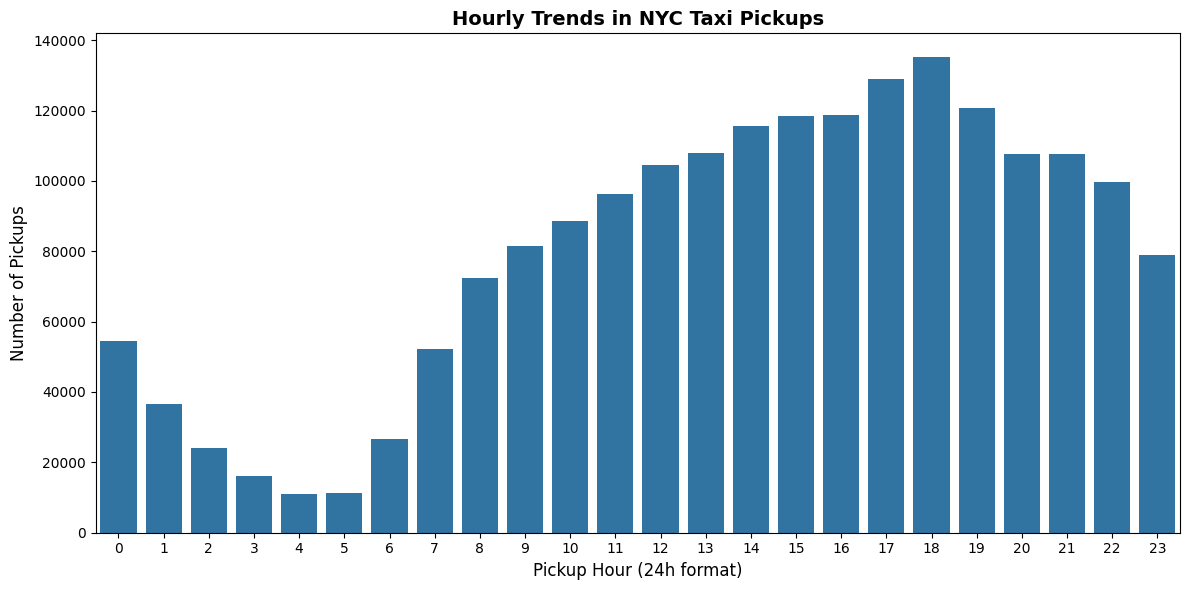

In [29]:
# Find and show the hourly trends in taxi pickups
plt.figure(figsize=[12,6])
sns.countplot(data=df,x='pickup_hour')
plt.xlabel('Pickup Hour (24h format)',fontsize=12)
plt.ylabel('Number of Pickups',fontsize=12)
plt.title('Hourly Trends in NYC Taxi Pickups', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

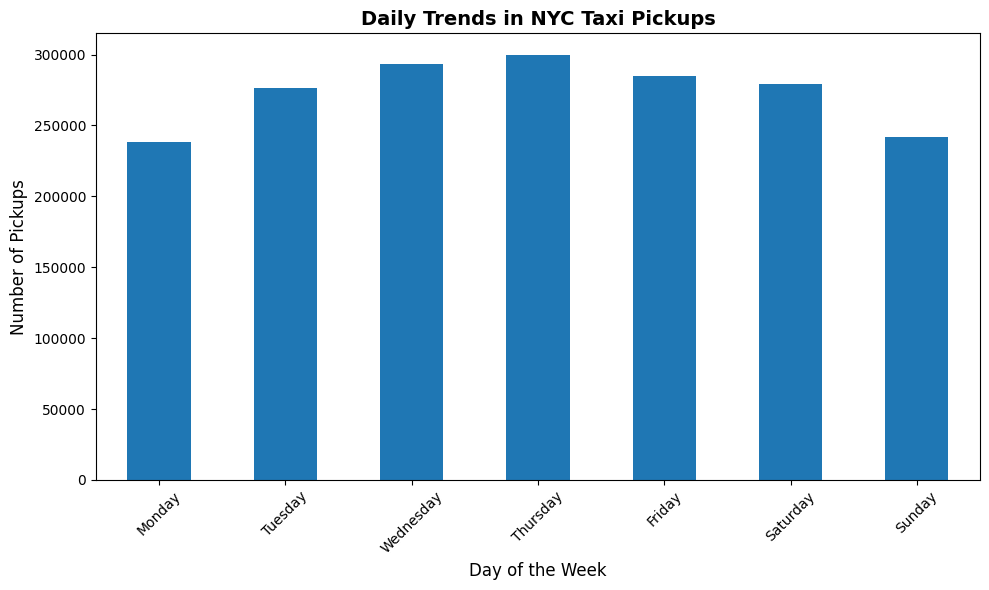

In [30]:
# Find and show the daily trends in taxi pickups (days of the week)
df['day_of_week']=df['tpep_pickup_datetime'].dt.day_name()
daily_trend=df['day_of_week'].value_counts().reindex(['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'])
plt.figure(figsize=[10,6])
daily_trend.plot(kind='bar')
plt.xlabel('Day of the Week',fontsize=12)
plt.ylabel('Number of Pickups',fontsize=12)
plt.xticks(rotation=45)
plt.title('Daily Trends in NYC Taxi Pickups', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

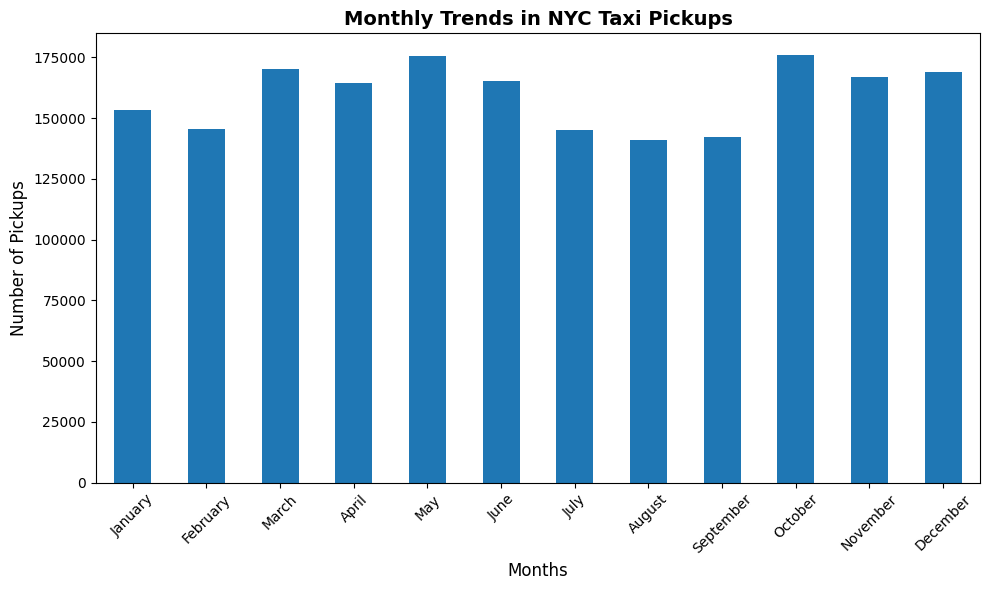

In [31]:
# Show the monthly trends in pickups
df['Month']=df['tpep_pickup_datetime'].dt.month_name()
monthly_trend=df['Month'].value_counts().reindex(['January','February','March','April','May','June','July','August','September','October','November','December'])
plt.figure(figsize=[10,6])
monthly_trend.plot(kind='bar')
plt.xlabel('Months',fontsize=12)
plt.ylabel('Number of Pickups',fontsize=12)
plt.xticks(rotation=45)
plt.title('Monthly Trends in NYC Taxi Pickups', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()


##### Financial Analysis

Take a look at the financial parameters like `fare_amount`, `tip_amount`, `total_amount`, and also `trip_distance`. Do these contain zero/negative values?

In [32]:
# Analyse the above parameters
col_to_analyse=['fare_amount','tip_amount','total_amount','trip_distance']
for col in col_to_analyse:
    zero_count=(df[col]==0).sum()
    negative_count=(df[col]<0).sum()
    print(f'{col}:')
    print(f'The number of zeroes are {zero_count}')
    print(f'The number of negatives are {negative_count}')

fare_amount:
The number of zeroes are 324
The number of negatives are 0
tip_amount:
The number of zeroes are 453124
The number of negatives are 0
total_amount:
The number of zeroes are 73
The number of negatives are 0
trip_distance:
The number of zeroes are 39467
The number of negatives are 0


Do you think it is beneficial to create a copy DataFrame leaving out the zero values from these?

**3.1.3** <font color = red>[2 marks]</font> <br>
Filter out the zero values from the above columns.

**Note:** The distance might be 0 in cases where pickup and drop is in the same zone. Do you think it is suitable to drop such cases of zero distance?

In [33]:
# Create a df with non zero entries for the selected parameters.
col_to_filter=['fare_amount','tip_amount','total_amount','trip_distance']
for col in col_to_filter:
    mask=df[col]==0
    df=df[~mask].copy()

**3.1.4** <font color = red>[3 marks]</font> <br>
Analyse the monthly revenue (`total_amount`) trend

In [34]:
# Group data by month and analyse monthly revenue
monthly_revenue=df.groupby('Month')['total_amount'].sum().reindex(['January','February','March','April','May','June','July','August','September','October','November','December'])
monthly_revenue

Month
January      3314678.12
February     3169790.94
March        3806780.69
April        3692815.40
May          4059103.16
June         3797052.52
July         3205499.64
August       3080566.99
September    3304607.61
October      4082059.83
November     3820695.86
December     3731913.60
Name: total_amount, dtype: float64

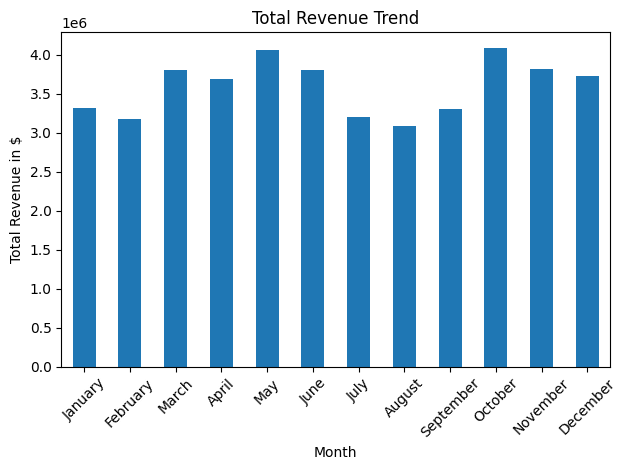

In [35]:
#Visualizing the analysis done above
monthly_revenue.plot(kind='bar')
plt.xlabel('Month')
plt.ylabel('Total Revenue in $')
plt.xticks(rotation=45)
plt.title('Total Revenue Trend')
plt.tight_layout()
plt.show()

**3.1.5** <font color = red>[3 marks]</font> <br>
Show the proportion of each quarter of the year in the revenue

In [36]:
# Calculate proportion of each quarter
df['Quarters']=df['tpep_pickup_datetime'].dt.quarter
quarter_revenue=df.groupby('Quarters')['total_amount'].sum()/df['total_amount'].sum()*100
quarter_revenue

Quarters
1    23.896702
2    26.817183
3    22.269937
4    27.016177
Name: total_amount, dtype: float64

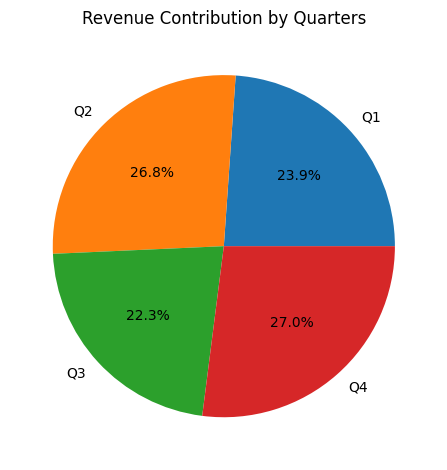

In [37]:
# Visualising the above analysis
labels=['Q1','Q2','Q3','Q4']
quarter_revenue.index=labels
quarter_revenue.plot(kind='pie',autopct='%.1f%%')
plt.ylabel('')
plt.title('Revenue Contribution by Quarters')
plt.tight_layout()
plt.show()

**3.1.6** <font color = red>[3 marks]</font> <br>
Visualise the relationship between `trip_distance` and `fare_amount`. Also find the correlation value for these two.

**Hint:** You can leave out the trips with trip_distance = 0

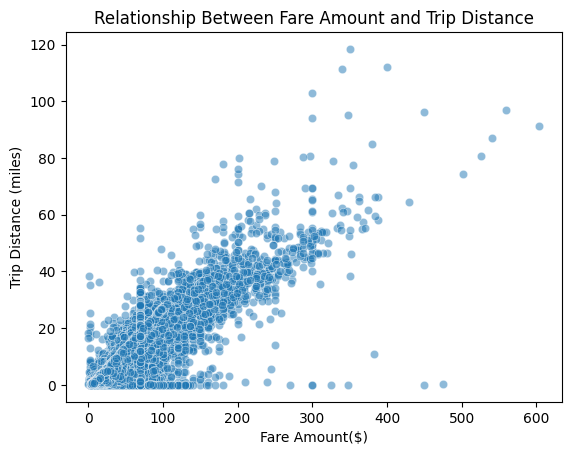

The correlation between Fare amount and Trip distance is 0.9497306401704226


In [38]:
# Show how trip fare is affected by distance
sns.scatterplot(data=df,x='fare_amount',y='trip_distance',alpha=0.5)
plt.xlabel('Fare Amount($)')
plt.ylabel('Trip Distance (miles)')
plt.title('Relationship Between Fare Amount and Trip Distance')
plt.show()

#Correlation between fare_amount and trip_distance
correlation=df['fare_amount'].corr(df['trip_distance'])
print('The correlation between Fare amount and Trip distance is',correlation)

**3.1.7** <font color = red>[5 marks]</font> <br>
Find and visualise the correlation between:
1. `fare_amount` and trip duration (pickup time to dropoff time)
2. `fare_amount` and `passenger_count`
3. `tip_amount` and `trip_distance`

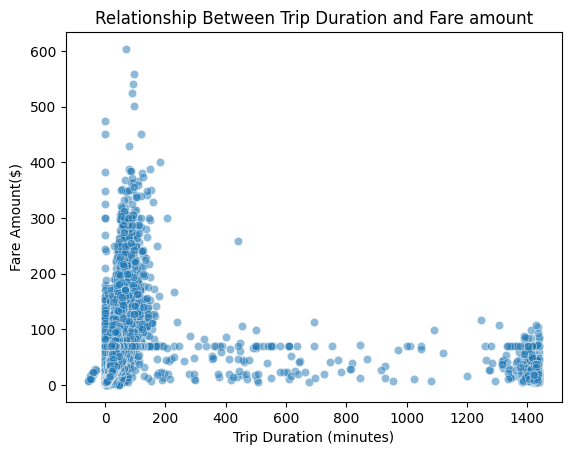

The correlation between Trip Duration and Fare amount is 0.32458000936571674


In [39]:
# Show relationship between fare and trip duration

#Finding the trip duration
df['trip_duration']=(df['tpep_dropoff_datetime']-df['tpep_pickup_datetime']).dt.total_seconds()/60

#visualizing the relationship
sns.scatterplot(data=df,x='trip_duration',y='fare_amount',alpha=0.5)
plt.xlabel('Trip Duration (minutes)')
plt.ylabel('Fare Amount($)')
plt.title('Relationship Between Trip Duration and Fare amount')
plt.show()

#Correlation between trip_duration and fare_amount
correlation=df['trip_duration'].corr(df['fare_amount'])
print('The correlation between Trip Duration and Fare amount is',correlation)


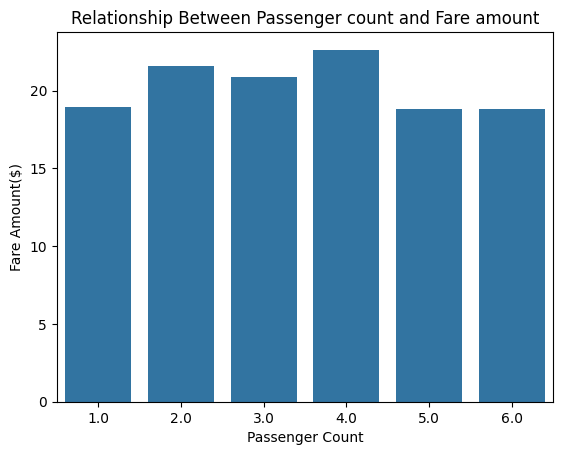

The correlation between Passenger count and Fare amount is 0.03527594981957835


In [40]:
# Show relationship between fare and number of passengers

#visualizing the relationship
avg_fare=df.groupby('passenger_count')['fare_amount'].mean().reset_index()
sns.barplot(data=avg_fare,x='passenger_count',y='fare_amount')
plt.xlabel('Passenger Count')
plt.ylabel('Fare Amount($)')
plt.title('Relationship Between Passenger count and Fare amount')
plt.show()

#Correlation between trip_duration and fare_amount
correlation=df['passenger_count'].corr(df['fare_amount'])
print('The correlation between Passenger count and Fare amount is',correlation)

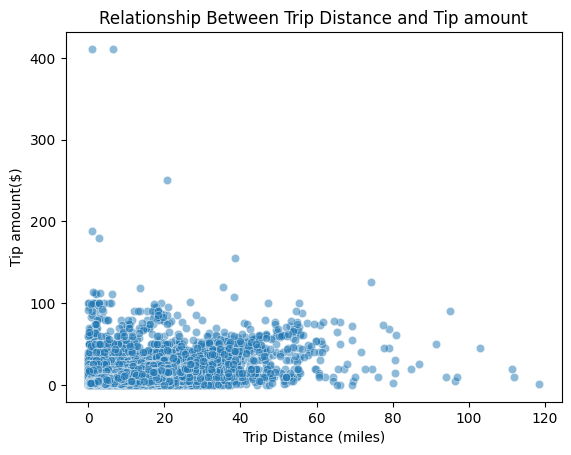

The correlation between Trip distance and Tip amount is 0.7972303930230289


In [41]:
# Show relationship between tip and trip distance

sns.scatterplot(data=df,x='trip_distance',y='tip_amount',alpha=0.5)
plt.xlabel('Trip Distance (miles)')
plt.ylabel('Tip amount($)')
plt.title('Relationship Between Trip Distance and Tip amount')
plt.show()

#Correlation between fare_amount and trip_distance
correlation=df['tip_amount'].corr(df['trip_distance'])
print('The correlation between Trip distance and Tip amount is',correlation)

**3.1.8** <font color = red>[3 marks]</font> <br>
Analyse the distribution of different payment types (`payment_type`)

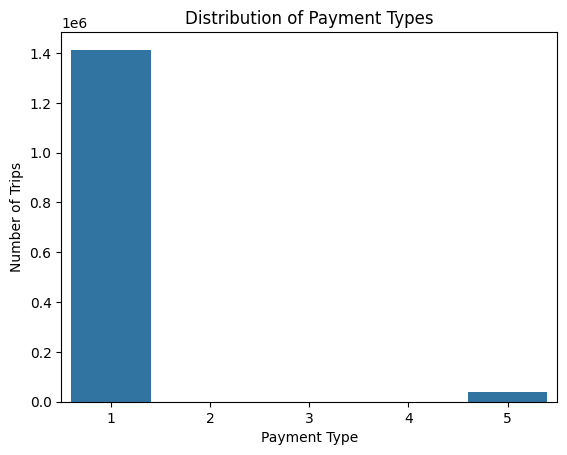

In [42]:
# Analyse the distribution of different payment types (payment_type).
sns.countplot(data=df,x='payment_type')
plt.xlabel('Payment Type')
plt.ylabel('Number of Trips')
plt.title('Distribution of Payment Types')
plt.show()

- 1= Credit card
- 2= Cash
- 3= No charge
- 4= Dispute
- 5=Unknown


##### Geographical Analysis

For this, you have to use the *taxi_zones.shp* file from the *taxi_zones* folder.

There would be multiple files inside the folder (such as *.shx, .sbx, .sbn* etc). You do not need to import/read any of the files other than the shapefile, *taxi_zones.shp*.

Do not change any folder structure - all the files need to be present inside the folder for it to work.

The folder structure should look like this:
```
Taxi Zones
|- taxi_zones.shp.xml
|- taxi_zones.prj
|- taxi_zones.sbn
|- taxi_zones.shp
|- taxi_zones.dbf
|- taxi_zones.shx
|- taxi_zones.sbx

 ```

 You only need to read the `taxi_zones.shp` file. The *shp* file will utilise the other files by itself.

We will use the *GeoPandas* library for geopgraphical analysis
```
import geopandas as gpd
```

More about geopandas and shapefiles: [About](https://geopandas.org/en/stable/about.html)


Reading the shapefile is very similar to *Pandas*. Use `gpd.read_file()` function to load the data (*taxi_zones.shp*) as a GeoDataFrame. Documentation: [Reading and Writing Files](https://geopandas.org/en/stable/docs/user_guide/io.html)

In [43]:
# !pip install geopandas
!pip install geopandas

Defaulting to user installation because normal site-packages is not writeable


**3.1.9** <font color = red>[2 marks]</font> <br>
Load the shapefile and display it.

In [44]:
# import geopandas as gpd
import geopandas as gpd
# Read the shapefile using geopandas
# read the .shp file using gpd
zones =gpd.read_file(r"C:\Users\Dell\Downloads\Datasets and Dictionary-NYC\Datasets and Dictionary\taxi_zones")
zones.head()

,OBJECTID,Shape_Leng,Shape_Area,zone,LocationID,borough,geometry
0,1,0.116357,0.000782,Newark Airport,1,EWR,"POLYGON ((933100.918 192536.086, 933091.011 19..."
1,2,0.433470,0.004866,Jamaica Bay,2,Queens,"MULTIPOLYGON (((1033269.244 172126.008, 103343..."
2,3,0.084341,0.000314,Allerton/Pelham Gardens,3,Bronx,"POLYGON ((1026308.77 256767.698, 1026495.593 2..."
3,4,0.043567,0.000112,Alphabet City,4,Manhattan,"POLYGON ((992073.467 203714.076, 992068.667 20..."
4,5,0.092146,0.000498,Arden Heights,5,Staten Island,"POLYGON ((935843.31 144283.336, 936046.565 144..."


Now, if you look at the DataFrame created, you will see columns like: `OBJECTID`,`Shape_Leng`, `Shape_Area`, `zone`, `LocationID`, `borough`, `geometry`.
<br><br>

Now, the `locationID` here is also what we are using to mark pickup and drop zones in the trip records.

The geometric parameters like shape length, shape area and geometry are used to plot the zones on a map.

This can be easily done using the `plot()` method.

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 263 entries, 0 to 262
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   OBJECTID    263 non-null    int32   
 1   Shape_Leng  263 non-null    float64 
 2   Shape_Area  263 non-null    float64 
 3   zone        263 non-null    object  
 4   LocationID  263 non-null    int32   
 5   borough     263 non-null    object  
 6   geometry    263 non-null    geometry
dtypes: float64(2), geometry(1), int32(2), object(2)
memory usage: 12.5+ KB
None


<Axes: >

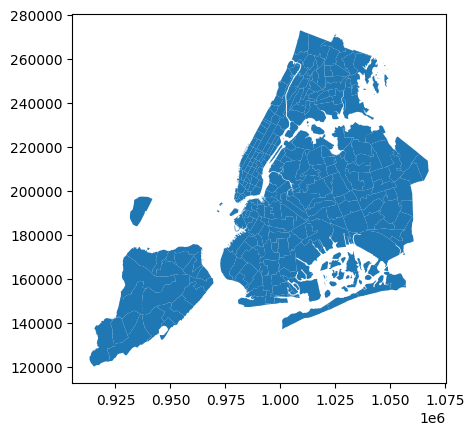

In [45]:
print(zones.info())
zones.plot()

Now, you have to merge the trip records and zones data using the location IDs.



**3.1.10** <font color = red>[3 marks]</font> <br>
Merge the zones data into trip data using the `locationID` and `PULocationID` columns.

In [46]:
# Merge zones and trip records using locationID and PULocationID
merged_data=df.merge(zones,left_on='PULocationID',right_on='LocationID',how='left')
merged_data.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,...,Month,Quarters,trip_duration,OBJECTID,Shape_Leng,Shape_Area,zone,LocationID,borough,geometry
0,2,2023-01-01 00:10:30,2023-01-01 00:11:49,1.0,0.49,1.0,N,239,238,1,...,January,1,1.316667,239.0,0.063626,0.000205,Upper West Side South,239.0,Manhattan,"POLYGON ((991168.979 226252.992, 991955.565 22..."
1,1,2023-01-01 00:47:17,2023-01-01 01:07:01,2.0,2.90,1.0,N,142,170,1,...,January,1,19.733333,142.0,0.038176,0.000076,Lincoln Square East,142.0,Manhattan,"POLYGON ((989380.305 218980.247, 989359.803 21..."
2,2,2023-01-01 00:06:02,2023-01-01 00:31:38,1.0,2.50,1.0,N,43,161,1,...,January,1,25.600000,43.0,0.099739,0.000380,Central Park,43.0,Manhattan,"POLYGON ((991852.973 217950.807, 991725.244 21..."
3,2,2023-01-01 00:02:19,2023-01-01 00:30:49,1.0,20.37,2.0,N,132,140,1,...,January,1,28.500000,132.0,0.245479,0.002038,JFK Airport,132.0,Queens,"MULTIPOLYGON (((1032791.001 181085.006, 103283..."
4,2,2023-01-01 00:56:00,2023-01-01 01:08:45,1.0,2.89,1.0,N,181,17,5,...,January,1,12.750000,181.0,0.089537,0.000307,Park Slope,181.0,Brooklyn,"POLYGON ((990954.947 181851.707, 990815.59 181..."


**3.1.11** <font color = red>[3 marks]</font> <br>
Group data by location IDs to find the total number of trips per location ID

In [47]:
# Group data by location and calculate the number of trips
trip_counts=merged_data.groupby('LocationID').size().reset_index(name='Trip_count')
trip_counts

,LocationID,Trip_count
0,1.0,37
1,3.0,3
2,4.0,1689
3,6.0,2
4,7.0,382
...,...,...
224,259.0,1
225,260.0,111
226,261.0,6918
227,262.0,20716


**3.1.12** <font color = red>[2 marks]</font> <br>
Now, use the grouped data to add number of trips to the GeoDataFrame.

We will use this to plot a map of zones showing total trips per zone.

In [48]:
# Merge trip counts back to the zones GeoDataFrame
zones_merged=zones.merge(trip_counts,on='LocationID', how='left')

The next step is creating a color map (choropleth map) showing zones by the number of trips taken.

Again, you can use the `zones.plot()` method for this. [Plot Method GPD](https://geopandas.org/en/stable/docs/reference/api/geopandas.GeoDataFrame.plot.html#geopandas.GeoDataFrame.plot)

But first, you need to define the figure and axis for the plot.

`fig, ax = plt.subplots(1, 1, figsize = (12, 10))`

This function creates a figure (fig) and a single subplot (ax)

---

After setting up the figure and axis, we can proceed to plot the GeoDataFrame on this axis. This is done in the next step where we use the plot method of the GeoDataFrame.

You can define the following parameters in the `zones.plot()` method:
```
column = '',
ax = ax,
legend = True,
legend_kwds = {'label': "label", 'orientation': "<horizontal/vertical>"}
```

To display the plot, use `plt.show()`.

**3.1.13** <font color = red>[3 marks]</font> <br>
Plot a color-coded map showing zone-wise trips

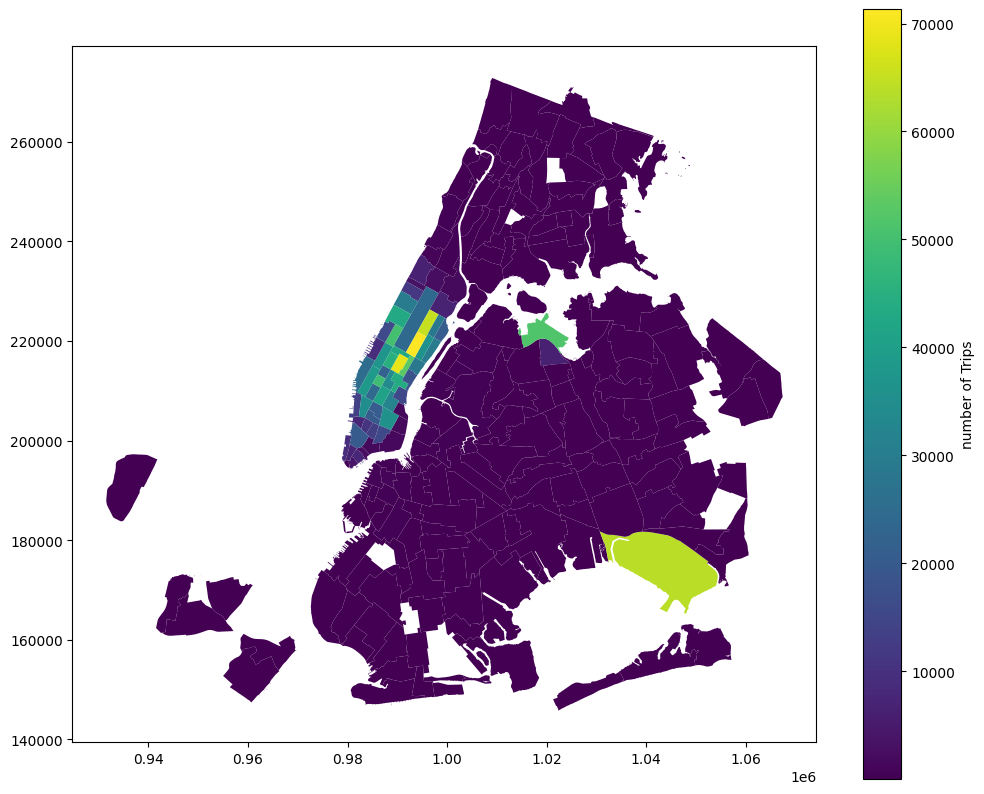

In [49]:
# Define figure and axis
fig,ax=plt.subplots(1,1,figsize=(12,10))
# Plot the map and display it
zones_merged.plot(column='Trip_count',ax=ax,legend=True,legend_kwds={'label':"number of Trips",'orientation': "vertical"})
plt.show()

In [50]:
# can you try displaying the zones DF sorted by the number of trips?
zones_merged=zones_merged.sort_values(by='Trip_count',ascending=False)
zones_merged[['LocationID','zone','borough','Trip_count']].head(10)

,LocationID,zone,borough,Trip_count
236,237,Upper East Side South,Manhattan,71326.0
160,161,Midtown Center,Manhattan,68702.0
235,236,Upper East Side North,Manhattan,65085.0
131,132,JFK Airport,Queens,64067.0
161,162,Midtown East,Manhattan,53112.0
137,138,LaGuardia Airport,Queens,51782.0
141,142,Lincoln Square East,Manhattan,50046.0
185,186,Penn Station/Madison Sq West,Manhattan,49137.0
229,230,Times Sq/Theatre District,Manhattan,45091.0
169,170,Murray Hill,Manhattan,43700.0


Here we have completed the temporal, financial and geographical analysis on the trip records.

**Compile your findings from general analysis below:**

You can consider the following points:

* Busiest hours, days and months
* Trends in revenue collected
* Trends in quarterly revenue
* How fare depends on trip distance, trip duration and passenger counts
* How tip amount depends on trip distance
* Busiest zones


#### **3.2** Detailed EDA: Insights and Strategies
<font color = red>[50 marks]</font> <br>

Having performed basic analyses for finding trends and patterns, we will now move on to some detailed analysis focussed on operational efficiency, pricing strategies, and customer experience.

##### Operational Efficiency

Analyze variations by time of day and location to identify bottlenecks or inefficiencies in routes

**3.2.1** <font color = red>[3 marks]</font> <br>
Identify slow routes by calculating the average time taken by cabs to get from one zone to another at different hours of the day.

Speed on a route *X* for hour *Y* = (*distance of the route X / average trip duration for hour Y*)

In [51]:
# Find routes which have the slowest speeds at different times of the day
merged_data['trip_duration']=merged_data['trip_duration']/60
route_speed=merged_data.groupby(['PULocationID','DOLocationID']).agg(
    total_distance=('trip_distance','sum'),
    avg_duration=('trip_duration','mean')).reset_index()
route_speed['speed']=route_speed['total_distance']/route_speed['avg_duration']
route_speed.sort_values(by='speed',ascending=True)

,PULocationID,DOLocationID,total_distance,avg_duration,speed
12525,260,25,6.83,21.399722,0.319163
8081,163,242,10.35,23.339167,0.443461
531,17,17,0.01,0.016667,0.600000
1308,43,16,17.54,23.950000,0.732359
9573,211,146,12.56,12.183472,1.030905
...,...,...,...,...,...
5503,132,230,54473.78,0.966041,56388.676854
5538,132,265,47251.12,0.725172,65158.488845
11273,236,237,9826.22,0.143878,68295.347862
11452,237,236,11697.45,0.137142,85294.164381


How does identifying high-traffic, high-demand routes help us?

**3.2.2** <font color = red>[3 marks]</font> <br>
Calculate the number of trips at each hour of the day and visualise them. Find the busiest hour and show the number of trips for that hour.

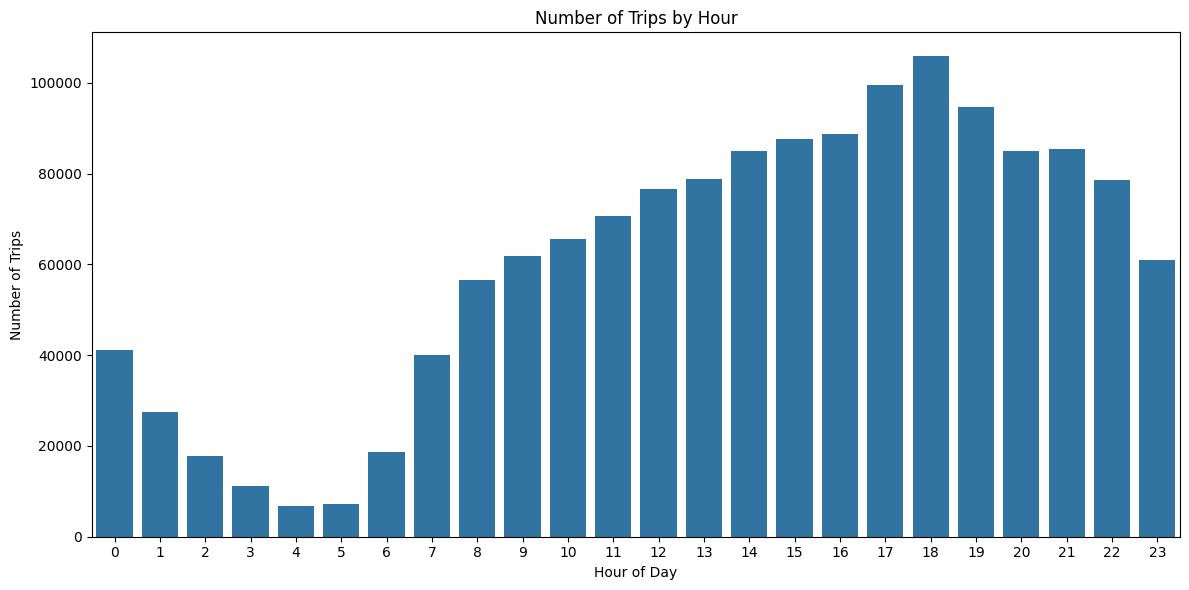

    pickup_hour  Trip_count
18           18      105860


In [52]:
# Visualise the number of trips per hour and find the busiest hour
hourly_pickup=merged_data.groupby('pickup_hour').size().reset_index(name='Trip_count')
plt.figure(figsize=[12,6])
sns.barplot(data=hourly_pickup, x='pickup_hour',y='Trip_count')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Trips')
plt.title('Number of Trips by Hour')
plt.tight_layout()
plt.show()

#Finding the Busiest hour
busiest_hour=hourly_pickup[hourly_pickup['Trip_count']==hourly_pickup['Trip_count'].max()]
print(busiest_hour)

Remember, we took a fraction of trips. To find the actual number, you have to scale the number up by the sampling ratio.

**3.2.3** <font color = red>[2 mark]</font> <br>
Find the actual number of trips in the five busiest hours

In [53]:
# Scale up the number of trips

# Fill in the value of your sampling fraction and use that to scale up the numbers
sample_fraction = 0.05 
hourly_pickup['actual_trip_count']=hourly_pickup['Trip_count']/sample_fraction
top_5_hours=hourly_pickup.nlargest(5,'actual_trip_count').copy()
top_5_hours

,pickup_hour,Trip_count,actual_trip_count
18,18,105860,2117200.0
17,17,99644,1992880.0
19,19,94730,1894600.0
16,16,88759,1775180.0
15,15,87615,1752300.0


**3.2.4** <font color = red>[3 marks]</font> <br>
Compare hourly traffic pattern on weekdays. Also compare for weekend.

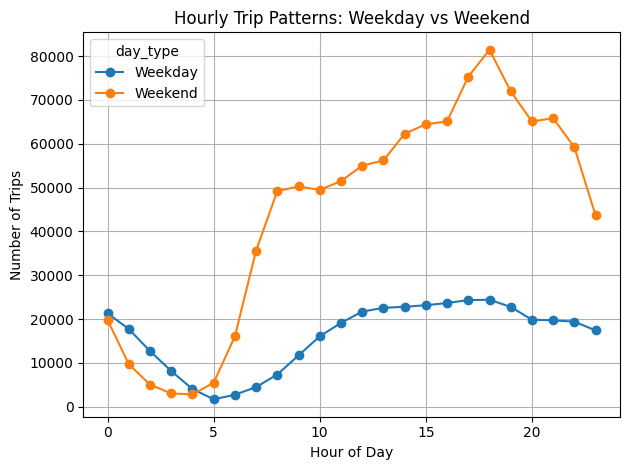

In [54]:
# Compare traffic trends for the week days and weekends
merged_data['nday_of_week']=merged_data['tpep_pickup_datetime'].dt.dayofweek
merged_data['day_type']=merged_data['nday_of_week'].apply(lambda x:'Weekday' if x>=5 else 'Weekend')
traffic_hour=merged_data.groupby(['day_type','pickup_hour']).size().reset_index(name='Trip_count')
pivoted_data=traffic_hour.pivot_table(index='pickup_hour',columns='day_type',values='Trip_count')
pivoted_data.plot(kind='line',marker='o')
plt.title('Hourly Trip Patterns: Weekday vs Weekend')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Trips')
plt.grid(True)
plt.tight_layout()
plt.show()


What can you infer from the above patterns? How will finding busy and quiet hours for each day help us?

**3.2.5** <font color = red>[3 marks]</font> <br>
Identify top 10 zones with high hourly pickups. Do the same for hourly dropoffs. Show pickup and dropoff trends in these zones.

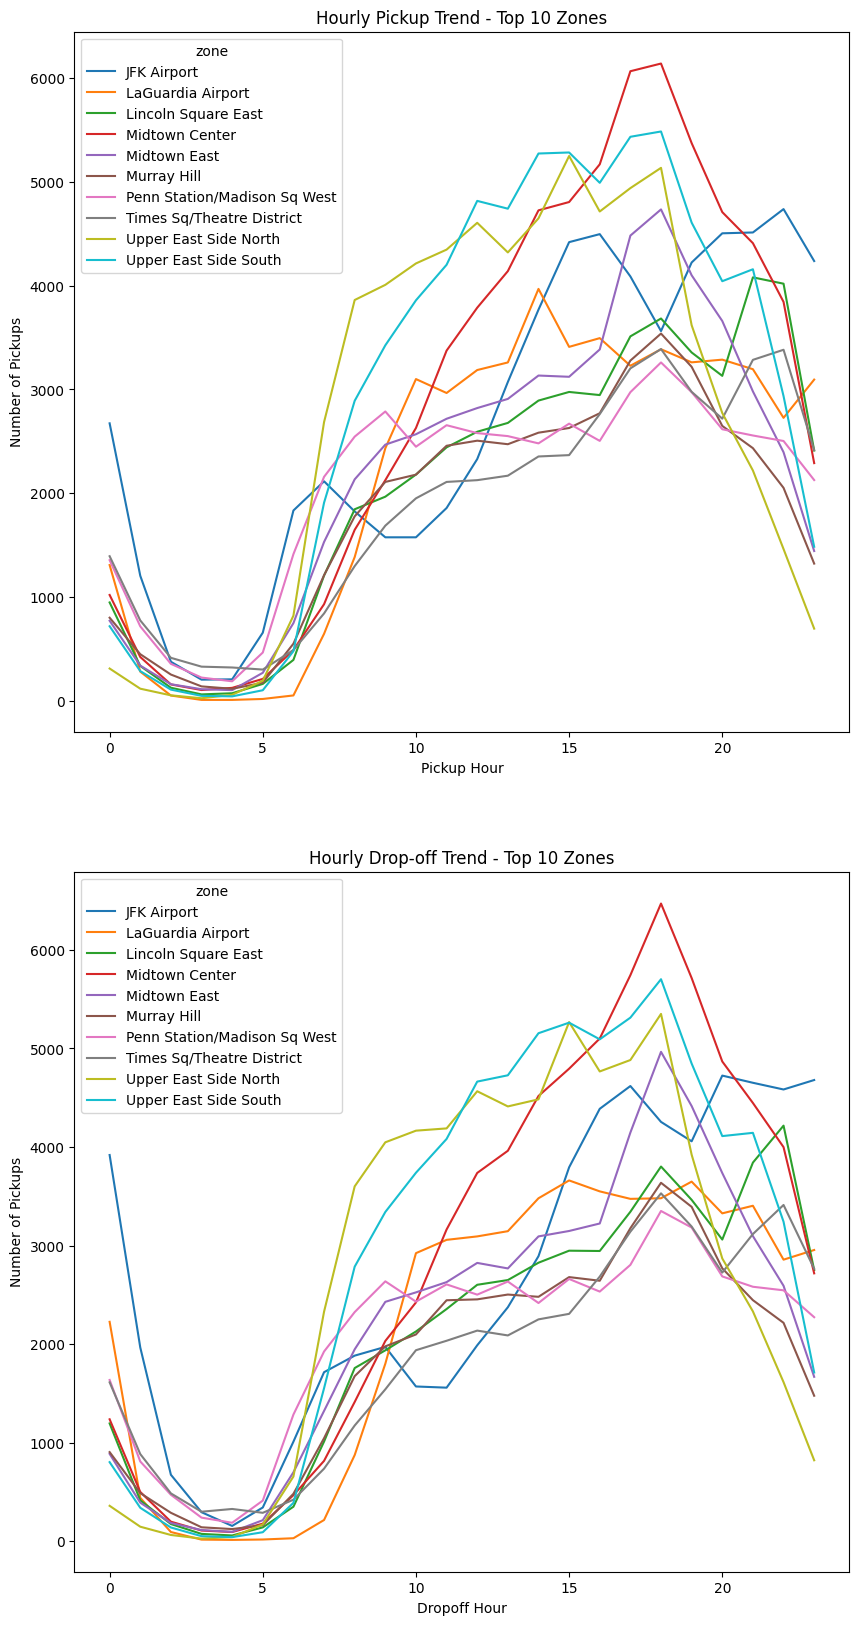

In [70]:
# Find top 10 pickup and dropoff zones
merged_data['dropoff_hour']=merged_data['tpep_dropoff_datetime'].dt.hour
# grouping top 10 pickup zones
pickup_hourly=merged_data.groupby(['zone','pickup_hour']).size().reset_index(name='pickup_count')
total_pickup=pickup_hourly.groupby('zone')['pickup_count'].sum().reset_index()
top_10_pickup_zones=total_pickup.nlargest(10,'pickup_count')['zone']
pickup_trend=pickup_hourly[pickup_hourly['zone'].isin(top_10_pickup_zones)]
#grouping top 10 dropoff zones 
dropoff_hourly=merged_data.groupby(['zone','dropoff_hour']).size().reset_index(name='dropoff_count')
total_dropoff=dropoff_hourly.groupby('zone')['dropoff_count'].sum().reset_index()
top_10_dropoff_zones=total_dropoff.nlargest(10,'dropoff_count')['zone']
dropoff_trend=dropoff_hourly[dropoff_hourly['zone'].isin(top_10_dropoff_zones)]
#plotting the trends 
plt.figure(figsize=[10,20])
plt.subplot(2,1,1)
sns.lineplot(data=pickup_trend, x='pickup_hour', y='pickup_count', hue='zone')
plt.title('Hourly Pickup Trend - Top 10 Zones')
plt.xlabel('Pickup Hour')
plt.ylabel('Number of Pickups')
plt.subplot(2,1,2)
sns.lineplot(data=dropoff_trend, x='dropoff_hour', y='dropoff_count', hue='zone')
plt.title('Hourly Drop-off Trend - Top 10 Zones')
plt.xlabel('Dropoff Hour')
plt.ylabel('Number of Pickups')
plt.show()

**3.2.6** <font color = red>[3 marks]</font> <br>
Find the ratio of pickups and dropoffs in each zone. Display the 10 highest (pickup/drop) and 10 lowest (pickup/drop) ratios.

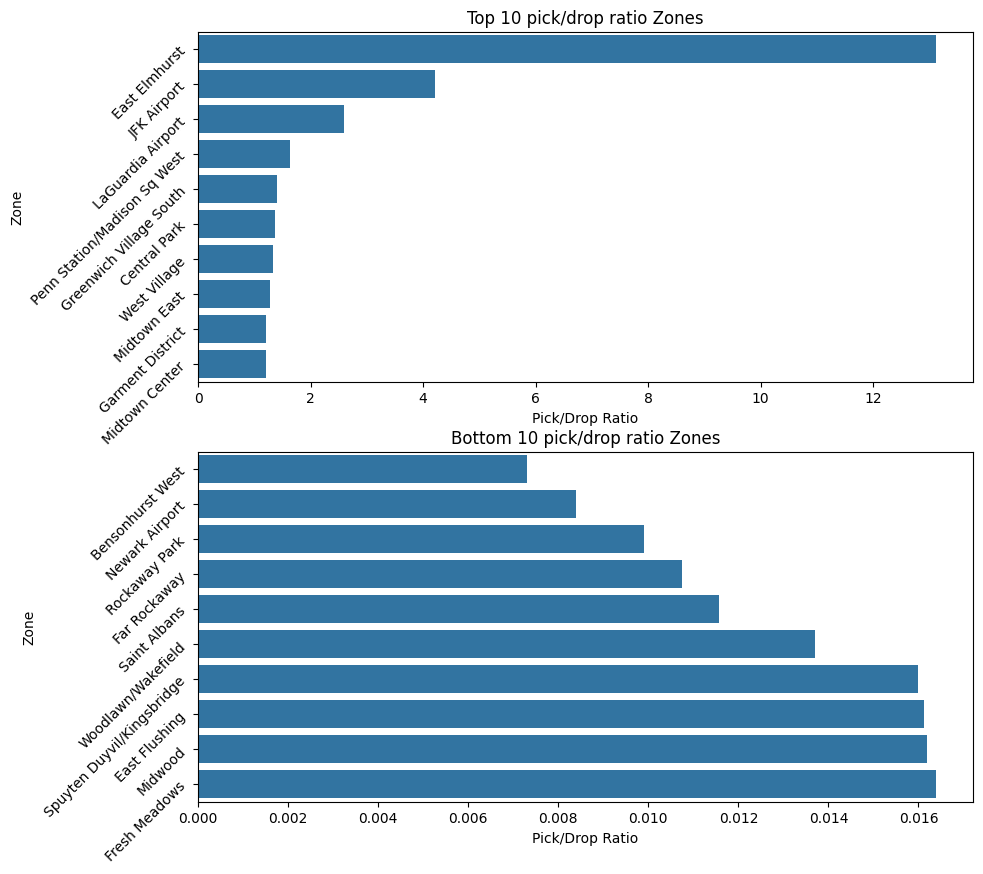

In [56]:
# Find the top 10 and bottom 10 pickup/dropoff ratios
pickup_zones=merged_data.groupby('PULocationID').size().reset_index(name='pickup_count')
pickup_zones=pickup_zones.merge(zones[['LocationID','zone']],left_on='PULocationID',right_on='LocationID', how='left')
pickup_zones=pickup_zones[['zone','pickup_count']]
# dropoff count per zone 
dropoff_zones=merged_data.groupby('DOLocationID').size().reset_index(name='dropoff_count')
dropoff_zones=dropoff_zones.merge(zones[['LocationID','zone']],left_on='DOLocationID',right_on='LocationID',how='left')
dropoff_zones=dropoff_zones[['zone','dropoff_count']]
#merging pickup and dropoff zones
zone_count=pd.merge(pickup_zones,dropoff_zones, on='zone', how='outer')
zone_count=zone_count.dropna(subset=['zone'])
zone_count=zone_count.fillna(0)
zone_count['pickdrop_ratio']=zone_count['pickup_count']/(zone_count['dropoff_count'].replace(0,np.nan))
#Ignoring the data which has ratio as 0, so we can find bottom 10
zone_count=zone_count[zone_count['pickdrop_ratio']!=0]
top10_zone= zone_count.sort_values(by='pickdrop_ratio', ascending=False)
bottom10_zone=zone_count.sort_values(by='pickdrop_ratio',ascending=True)
#visualising the data
plt.figure(figsize=[10,10])
plt.subplot(2,1,1)
sns.barplot(data=top10_zone.head(10), x='pickdrop_ratio', y='zone')
plt.title('Top 10 pick/drop ratio Zones')
plt.xlabel('Pick/Drop Ratio')
plt.ylabel('Zone')
plt.yticks(rotation=45)
plt.subplot(2,1,2)
sns.barplot(data=bottom10_zone.head(10), x='pickdrop_ratio', y='zone')
plt.title('Bottom 10 pick/drop ratio Zones')
plt.xlabel('Pick/Drop Ratio')
plt.ylabel('Zone')
plt.yticks(rotation=45)
plt.show()


**3.2.7** <font color = red>[3 marks]</font> <br>
Identify zones with high pickup and dropoff traffic during night hours (11PM to 5AM)

In [57]:
# During night hours (11pm to 5am) find the top 10 pickup and dropoff zones
# Note that the top zones should be of night hours and not the overall top zones
night_hours=[23,0,1,2,3,4,5]
night_pickup=merged_data[merged_data['pickup_hour'].isin(night_hours)]
night_dropoff=merged_data[merged_data['dropoff_hour'].isin(night_hours)]
night_pickup=night_pickup.groupby('zone').size().reset_index(name='count')
night_dropoff=night_dropoff.groupby('zone').size().reset_index(name='count')
print('The top 10 pickup zones at night\n',night_pickup.head(10))
print('The top 10 dropoff zones at night\n',night_dropoff.head(10))

The top 10 pickup zones at night
                       zone  count
0            Alphabet City    949
1  Arrochar/Fort Wadsworth      1
2                  Astoria     82
3             Astoria Park      1
4             Baisley Park     20
5               Bath Beach      1
6             Battery Park      6
7        Battery Park City    209
8                Bay Ridge      7
9                  Bayside      1
The top 10 dropoff zones at night
                       zone  count
0            Alphabet City    980
1  Arrochar/Fort Wadsworth      1
2                  Astoria     79
3             Astoria Park      1
4             Baisley Park     31
5               Bath Beach      1
6             Battery Park      7
7        Battery Park City    243
8                Bay Ridge      7
9                  Bayside      1


Now, let us find the revenue share for the night time hours and the day time hours. After this, we will move to deciding a pricing strategy.

**3.2.8** <font color = red>[2 marks]</font> <br>
Find the revenue share for nighttime and daytime hours.

In [58]:
# Filter for night hours (11 PM to 5 AM)
night_hours=[23,0,1,2,3,4,5]
night_data=merged_data[merged_data['pickup_hour'].isin(night_hours)]
night_revenue=night_data['total_amount'].sum()
print('The revenue at night time is',night_revenue)
# Filter for day hours
day_hours=list(range(6,23))
day_data=merged_data[merged_data['pickup_hour'].isin(day_hours)]
day_revenue=day_data['total_amount'].sum()
print('The revenue at day time is',day_revenue)

The revenue at night time is 5189355.5200000005
The revenue at day time is 37878234.11000001


##### Pricing Strategy

**3.2.9** <font color = red>[2 marks]</font> <br>
For the different passenger counts, find the average fare per mile per passenger.

For instance, suppose the average fare per mile for trips with 3 passengers is 3 USD/mile, then the fare per mile per passenger will be 1 USD/mile.

In [59]:
# Analyse the fare per mile per passenger for different passenger counts
faremile_data=merged_data[['fare_amount','passenger_count','trip_distance']]
faremile_data['fare/mile/passenger']=(faremile_data['fare_amount']/faremile_data['trip_distance'])/faremile_data['passenger_count']
fare_stats=faremile_data.groupby('passenger_count')['fare/mile/passenger'].mean()
fare_stats

passenger_count
1.0    9.263900
2.0    5.281917
3.0    3.504588
4.0    4.256153
5.0    1.535935
6.0    1.365900
Name: fare/mile/passenger, dtype: float64

**3.2.10** <font color = red>[3 marks]</font> <br>
Find the average fare per mile by hours of the day and by days of the week

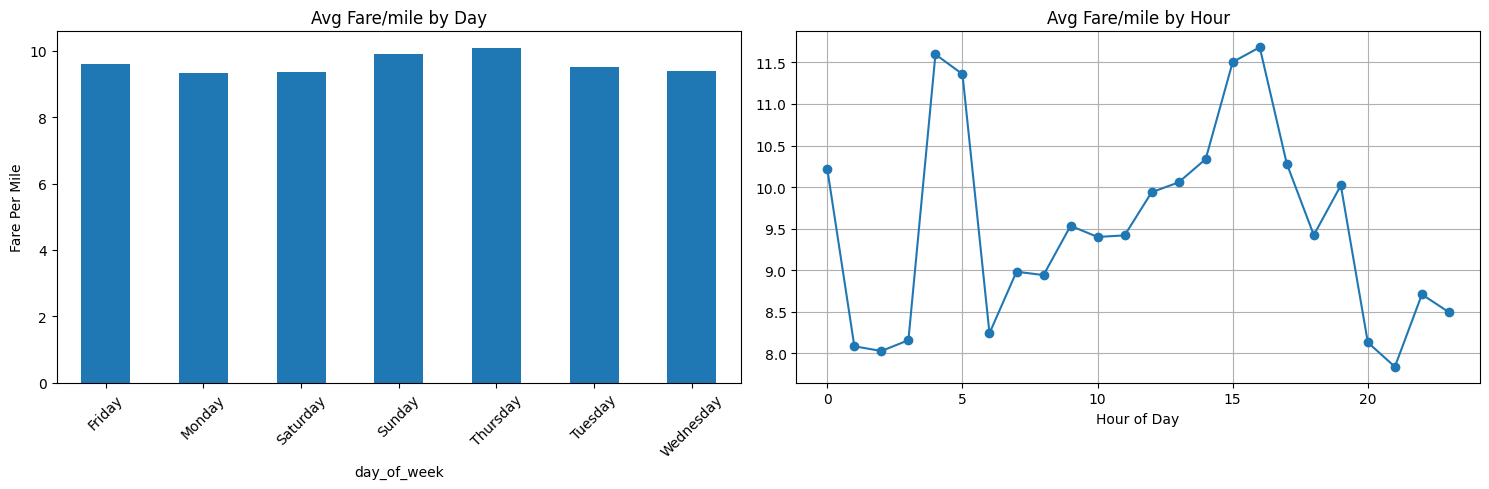

In [60]:
# Compare the average fare per mile for different days and for different times of the day
fare_mile=merged_data[['trip_distance','fare_amount','day_of_week','pickup_hour']]
fare_mile['fare/mile']=fare_mile['fare_amount']/fare_mile['trip_distance']
day_fare=fare_mile.groupby('day_of_week')['fare/mile'].mean()
hour_fare=fare_mile.groupby('pickup_hour')['fare/mile'].mean()
plt.figure(figsize=[15,5])
plt.subplot(1,2,1)
day_fare.plot.bar()
plt.title('Avg Fare/mile by Day')
plt.ylabel('Fare Per Mile')
plt.xticks(rotation=45)
plt.subplot(1,2,2)
hour_fare.plot.line(marker='o')
plt.title('Avg Fare/mile by Hour')
plt.xlabel('Hour of Day')
plt.xticks(rotation=0)
plt.grid(True)
plt.tight_layout()
plt.show()


**3.2.11** <font color = red>[3 marks]</font> <br>
Analyse the average fare per mile for the different vendors for different hours of the day

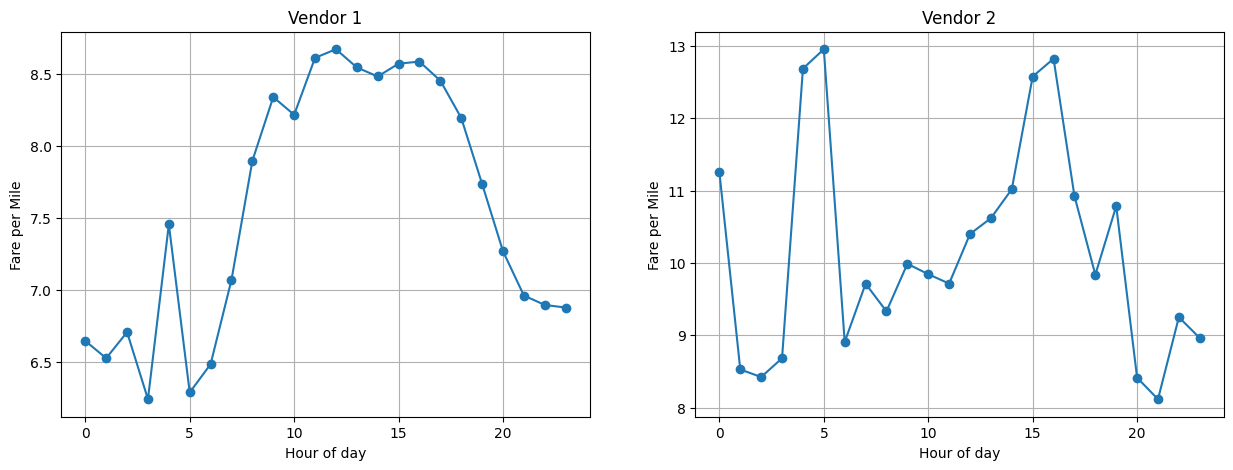

In [61]:
# Compare fare per mile for different vendors
fare_mile=merged_data[['trip_distance','fare_amount','VendorID','pickup_hour']]
fare_mile['fare/mile']=fare_mile['fare_amount']/fare_mile['trip_distance']
vendor1=fare_mile[fare_mile['VendorID']==1]
vendor2=fare_mile[fare_mile['VendorID']==2]
v1_stats=vendor1.groupby('pickup_hour')['fare/mile'].mean()
v2_stats=vendor2.groupby('pickup_hour')['fare/mile'].mean()
plt.figure(figsize=[15,5])
plt.subplot(1,2,1)
v1_stats.plot.line(marker='o')
plt.title('Vendor 1')
plt.xlabel('Hour of day')
plt.ylabel('Fare per Mile')
plt.grid(True)
plt.subplot(1,2,2)
v2_stats.plot.line(marker='o')
plt.title('Vendor 2')
plt.xlabel('Hour of day')
plt.ylabel('Fare per Mile')
plt.grid(True)
plt.show()


**3.2.12** <font color = red>[5 marks]</font> <br>
Compare the fare rates of the different vendors in a tiered fashion. Analyse the average fare per mile for distances upto 2 miles. Analyse the fare per mile for distances from 2 to 5 miles. And then for distances more than 5 miles.


   VendorID distance_tier  fare/mile
3         2     Long trip   4.491915
0         1     Long trip   4.471814
4         2   Medium trip   6.530843
1         1   Medium trip   6.370477
5         2    short trip  14.020336
2         1    short trip   9.488627


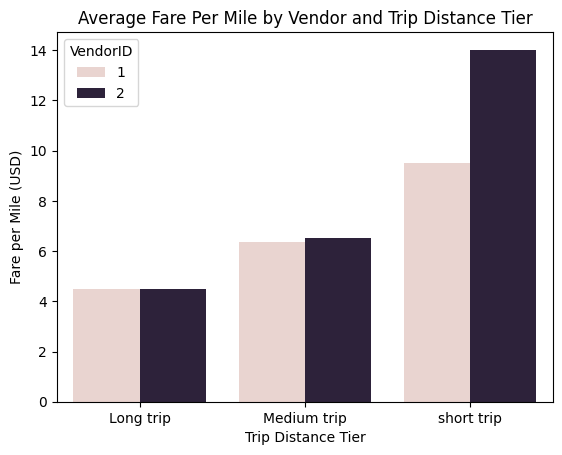

In [62]:
# Defining distance tiers
def tier (dist):
    if dist <=2:
        return 'short trip'
    elif dist>2 and dist<=5:
        return 'Medium trip'
    else:
        return 'Long trip'

fare_mile=merged_data[['trip_distance','fare_amount','VendorID',]]
fare_mile['fare/mile']=fare_mile['fare_amount']/fare_mile['trip_distance']
fare_mile['distance_tier']=fare_mile['trip_distance'].apply(tier)
vendor_comparison=fare_mile.groupby(['VendorID','distance_tier'])['fare/mile'].mean().reset_index().sort_values(by=['distance_tier','fare/mile'],ascending=[True,False])
print(vendor_comparison)
sns.barplot(data=vendor_comparison,x='distance_tier',y='fare/mile',hue='VendorID')
plt.title('Average Fare Per Mile by Vendor and Trip Distance Tier')
plt.ylabel('Fare per Mile (USD)')
plt.xlabel('Trip Distance Tier')
plt.show()


##### Customer Experience and Other Factors

**3.2.13** <font color = red>[5 marks]</font> <br>
Analyse average tip percentages based on trip distances, passenger counts and time of pickup. What factors lead to low tip percentages?

  distance_scale  tip_perecentage
0            0-2        28.765689
1            2-5        23.040088
2           5-10        22.496201
3          10-20        23.479011
4            20+        20.982896
   passenger_count  tip_perecentage
0              1.0        26.028677
1              2.0        25.898616
2              3.0        25.820489
3              4.0        25.948806
4              5.0        36.820532
5              6.0        26.098001
    pickup_hour  tip_perecentage
0             0        25.825264
1             1        26.159942
2             2        26.467151
3             3        27.015020
4             4        25.936506
5             5        26.012823
6             6        24.858478
7             7        24.730407
8             8        24.775591
9             9        25.189591
10           10        25.616075
11           11        25.402453
12           12        25.332951
13           13        25.450608
14           14        25.107568
15           15 

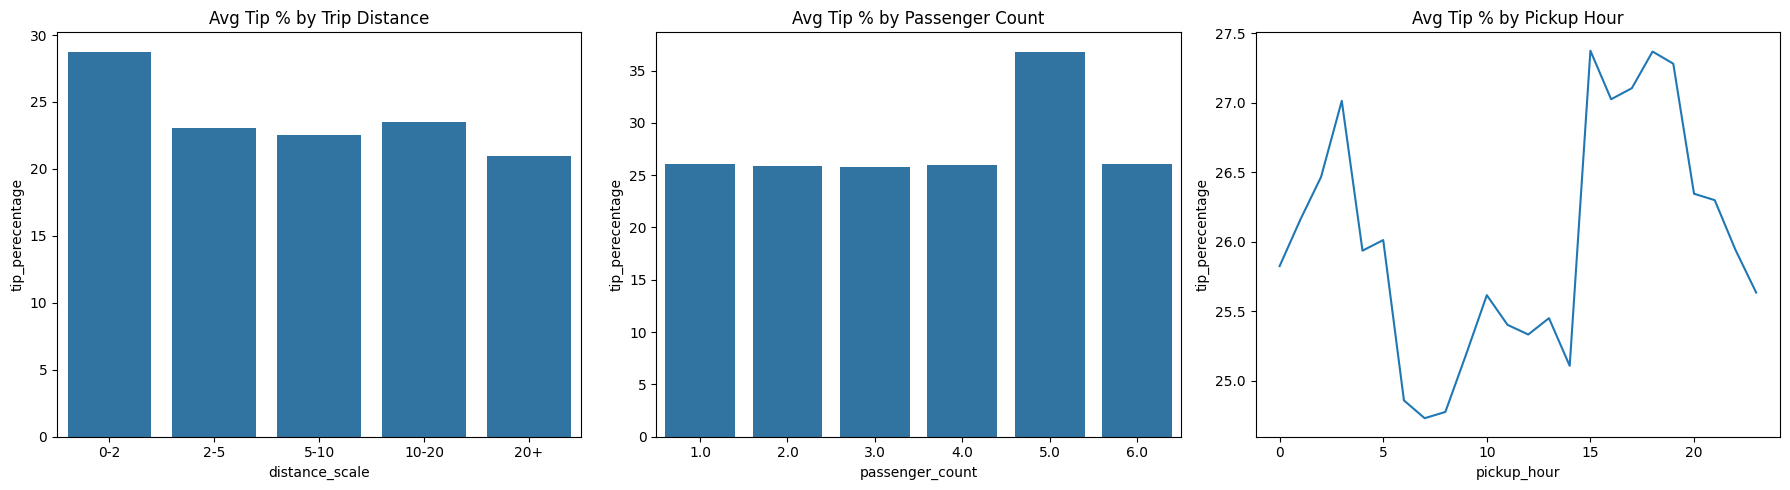

In [63]:
#  Analyze tip percentages based on distances, passenger counts and pickup times
tip_stat=merged_data[['fare_amount','tip_amount','trip_distance','passenger_count','pickup_hour']]
tip_stat['tip_perecentage']=tip_stat['tip_amount']/tip_stat['fare_amount']*100
tip_stat['distance_scale']=pd.cut(tip_stat['trip_distance'],bins=[0,2,5,10,20, float('inf')],labels=['0-2','2-5','5-10','10-20','20+'])
tip_by_distance=tip_stat.groupby('distance_scale')['tip_perecentage'].mean().reset_index()
print(tip_by_distance)
tip_by_passenger=tip_stat.groupby('passenger_count')['tip_perecentage'].mean().reset_index()
print(tip_by_passenger)
tip_by_hour=tip_stat.groupby('pickup_hour')['tip_perecentage'].mean().reset_index()
print(tip_by_hour)
#Visualising the data
plt.figure(figsize=[18,5])
plt.subplot(1,3,1)
sns.barplot(data=tip_by_distance,x='distance_scale',y='tip_perecentage')
plt.title('Avg Tip % by Trip Distance')
plt.subplot(1,3,2)
sns.barplot(data=tip_by_passenger,x='passenger_count',y='tip_perecentage')
plt.title('Avg Tip % by Passenger Count')
plt.subplot(1,3,3)
sns.lineplot(data=tip_by_hour,x='pickup_hour',y='tip_perecentage')
plt.title('Avg Tip % by Pickup Hour')
plt.tight_layout()
plt.show()


Additional analysis [optional]: Let's try comparing cases of low tips with cases of high tips to find out if we find a clear aspect that drives up the tipping behaviours

In [64]:
# Compare trips with tip percentage < 10% to trips with tip percentage > 25%
tip10=tip_stat[tip_stat['tip_perecentage']<10]
tip25=tip_stat[tip_stat['tip_perecentage']>25]
print(tip10['trip_distance'].describe())
print(tip25['trip_distance'].describe())
print(tip10['passenger_count'].value_counts())
print(tip25['passenger_count'].value_counts())

count    79007.000000
mean         4.935885
std          5.625784
min          0.010000
25%          1.720000
50%          2.720000
75%          5.330000
max        118.450000
Name: trip_distance, dtype: float64
count    824385.000000
mean          2.308017
std           2.925370
min           0.010000
25%           0.920000
50%           1.430000
75%           2.230000
max          94.990000
Name: trip_distance, dtype: float64
passenger_count
1.0    61927
2.0    11173
3.0     2782
4.0     1434
5.0     1030
6.0      661
Name: count, dtype: int64
passenger_count
1.0    646151
2.0    117754
3.0     28492
4.0     14040
5.0     10871
6.0      7077
Name: count, dtype: int64


**3.2.14** <font color = red>[3 marks]</font> <br>
Analyse the variation of passenger count across hours and days of the week.

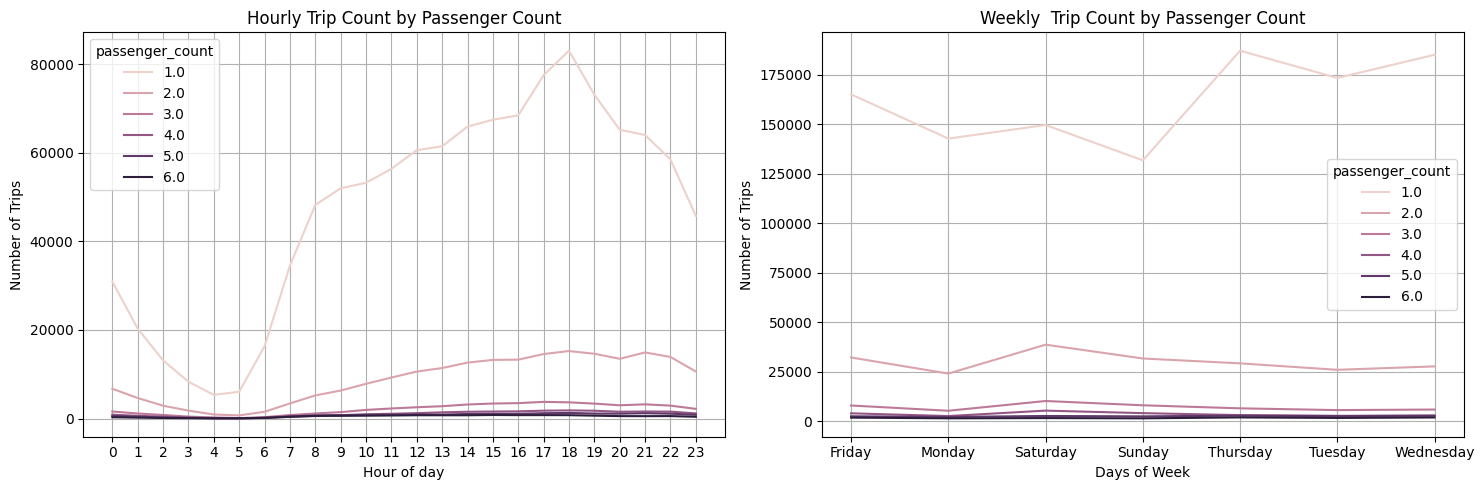

In [65]:
# See how passenger count varies across hours and days
hourly_passengers=merged_data.groupby(['pickup_hour','passenger_count']).size().reset_index(name='trip_count')
day_passengers=merged_data.groupby(['day_of_week','passenger_count']).size().reset_index(name='trip_count')
plt.figure(figsize=[15,5])
plt.subplot(1,2,1)
sns.lineplot(data=hourly_passengers,x='pickup_hour',y='trip_count',hue='passenger_count')
plt.title('Hourly Trip Count by Passenger Count')
plt.xlabel('Hour of day')
plt.xticks(range(0,24))
plt.ylabel('Number of Trips')
plt.grid(True)
plt.subplot(1,2,2)
sns.lineplot(data=day_passengers,x='day_of_week',y='trip_count',hue='passenger_count')
plt.title('Weekly  Trip Count by Passenger Count')
plt.xlabel('Days of Week')
plt.ylabel('Number of Trips')
plt.grid(True)
plt.tight_layout()
plt.show()


**3.2.15** <font color = red>[2 marks]</font> <br>
Analyse the variation of passenger counts across zones

In [66]:
# How does passenger count vary across zones
zone_passengers=merged_data.groupby(['zone','passenger_count']).size().reset_index(name='trip_count')
zone_passengers


,zone,passenger_count,trip_count
0,Allerton/Pelham Gardens,1.0,3
1,Alphabet City,1.0,1318
2,Alphabet City,2.0,235
3,Alphabet City,3.0,66
4,Alphabet City,4.0,42
...,...,...,...
809,Yorkville West,2.0,3737
810,Yorkville West,3.0,854
811,Yorkville West,4.0,366
812,Yorkville West,5.0,413


In [67]:
# For a more detailed analysis, we can use the zones_with_trips GeoDataFrame
# Create a new column for the average passenger count in each zone.
avg_zone=merged_data.groupby('zone')['passenger_count'].mean()
avg_zone


zone
Allerton/Pelham Gardens    1.000000
Alphabet City              1.367081
Arrochar/Fort Wadsworth    2.000000
Astoria                    1.264398
Astoria Park               1.500000
                             ...   
Woodlawn/Wakefield         2.000000
Woodside                   1.396396
World Trade Center         1.467332
Yorkville East             1.302472
Yorkville West             1.329936
Name: passenger_count, Length: 229, dtype: float64

Find out how often surcharges/extra charges are applied to understand their prevalance

**3.2.16** <font color = red>[5 marks]</font> <br>
Analyse the pickup/dropoff zones or times when extra charges are applied more frequently

In [68]:
# How often is each surcharge applied?
surcharge_col = ['extra','mta_tax','congestion_surcharge','airport_fee','improvement_surcharge']
for col in surcharge_col:
    applied=(merged_data[col]).sum()
    percent=(applied/len(merged_data))*100
    print(f"{col}: Applied in {applied} trips ({percent:.2f}%)")
# Top Pickup Zone with Extra charges
for col in surcharge_col:
    zone_charges=merged_data[merged_data[col]>0].groupby('zone').size().sort_values(ascending=False).head(5)
    print(f'\nTop zones where {col} is applied most frequently:')
    print(zone_charges)

#Top pickup hours with extra charges
for col in surcharge_col:
    hour_charges=merged_data[merged_data[col]>0].groupby('pickup_hour').size().sort_values(ascending=False).head(5)
    print(f'\nTop pickup hours where {col} is applied most frequently:')
    print(hour_charges)


extra: Applied in 2388818.68 trips (164.50%)
mta_tax: Applied in 721800.5 trips (49.70%)
congestion_surcharge: Applied in 3449447.5 trips (237.54%)
airport_fee: Applied in 188909.75 trips (13.01%)
improvement_surcharge: Applied in 1451718.3000000021 trips (99.97%)

Top zones where extra is applied most frequently:
zone
LaGuardia Airport        51214
Midtown Center           44751
Upper East Side South    40980
Upper East Side North    33894
Midtown East             33326
dtype: int64

Top zones where mta_tax is applied most frequently:
zone
Upper East Side South    71221
Midtown Center           68272
Upper East Side North    65000
JFK Airport              63032
Midtown East             52832
dtype: int64

Top zones where congestion_surcharge is applied most frequently:
zone
Upper East Side South    71192
Midtown Center           68286
Upper East Side North    64819
Midtown East             52865
Lincoln Square East      49901
dtype: int64

Top zones where airport_fee is applied most f

## **4** Conclusion
<font color = red>[15 marks]</font> <br>

### **4.1** Final Insights and Recommendations
<font color = red>[15 marks]</font> <br>

Conclude your analyses here. Include all the outcomes you found based on the analysis.

Based on the insights, frame a concluding story explaining suitable parameters such as location, time of the day, day of the week etc. to be kept in mind while devising a strategy to meet customer demand and optimise supply.

**4.1.1** <font color = red>[5 marks]</font> <br>
Recommendations to optimize routing and dispatching based on demand patterns and operational inefficiencies

- Deploy more taxis in high-demand zones like Midtown,JFK and LaGuardia during peak hours.
- Use live data to spot areas where there are more people trying to get rides and then move the idle cabs to the busy areas where there is  high demand for pickup.
- During evening hours (6-9PM) and weekend late-nights, it's necessary to increase taxi availability.
- In night hours(11Pm-5PM),there are alot of demand around entertainment zones, and airports. We can have dedicated night taxis to meet the demand.
- Use historical speed data per zone to detect traffic bottlenecks.
- Redirect drivers through less congested alternative routes using traffic preditions,especially during weekday morinng and evening rush hours.
- Adjust shift start and end timings to match demand and keep the fleet balanced all day.
- Designate 'hot zones' for staging taxis during idle times instead of waiting at low-demand.
- Impletment a predictive dispatch system that uses hourly,zonal,and day-of-week trends to forecast upcoming demand.
- combine with real-time ride requests to dynamically postion drivers closer to where demand is likely to occur, reducing wait times and idle mileage.

**4.1.2** <font color = red>[5 marks]</font> <br>

Suggestions on strategically positioning cabs across different zones to make best use of insights uncovered by analysing trip trends across time, days and months.

- Morning Hours(6AM - 10AM): Position cabs near residential areas and transit hubs like Queens and Upper Manhattan, where people begin commutes.
- weekday Evening (5-9 PM): Shift cabs to commercial and business zones such as Midtown and Financial District to serve office returnees.
- Weekend Evenings & Nights (8 PM- 2AM): Concentrate in entertainment and nightlife hotspots-especially Times Square, East Village, and near bridges/tunnels.
- Weekdays: Higher traffic is seen during morning and evening rush hours, mainy driven by commutes and business travel. Priotize business centers, office parks, and transport stations.
- Weekends:Focus on entertainment zones, shopping centers, and residential pick-ups. Demand often spikes in evening and night. Align fleet availability accordingly.
- Priortize high-frequency zones such as Midtown,JFK Airport, LaGuardia, Times Square and Upper Manhattan during all peak windows.
- Monitor zones with a low pickup-to drop ratio- these may serve better as staging areas where drivers wait to be dispatched to nearby high-demand zones.
- Adjust dispatch in real-time based on zone-level trip density during special events, holidays, or weather changes, which can significantly impact demand.
- Tourism-heavy months(eg. June-August and December) show increased demand near landmarks, museums, and airports. Scale up deployment accordingly.
- During colder months, except more pickups from residential zones and indoor attractions due to weather-driven behavior.

**4.1.3** <font color = red>[5 marks]</font> <br>
Propose data-driven adjustments to the pricing strategy to maximize revenue while maintaining competitive rates with other vendors.

- Introduce dynamic tiered pricing- charge slightly more per mile for short trips, where demand is high and wait times are low.
- Offer discounts or bundled pricing on medium (2-5 miles) and long trips (>5 miles) to increase usage and remain competitive.
- Apply surge pricing during peak hours (6-10 AM, 5-9 PM) to capitalize on demand.
- Offer off-peak discounts or promotions during midday and late night to stimulate usage.
- Consider flat group fares for rides with 3+ passengers to promote shared rides and reduce cost per head.
- This could encourage higher occupancy, improving fuel efficiency and driver revenue.
- Vendor 1 should reassess pricing in mid and long-trip segments to stay competitve.
- Alternatively, justify premium rates with improved service quality or loyalty perks.
- Highlight or promote drivers with high ratings during high-tip hours to increase customer satisfaction and potentially raise tip-based revenue.
- Bundle surcharge explanations into upfront pricing to reduce friction.
- Consider waiving some surcharges off-peak to incentivize travel during low-demand times.

Jupyter Notebook by:
V.Prashanthi